# **ĐỒ ÁN CUỐI KÌ: KHOA HỌC DỮ LIỆU ỨNG DỤNG**

## **Thực hiện:**
|<font size=4> Tên </font>|<font size=4> MSSV </font>|
|-------------------------|----------------------------------|
|<font size=4> Nguyễn Đình Hoàng Nguyên </font>|<font size=4> 19120606 </font>|

# **Giai đoạn 2: Khai thác thông tin cơ bản của dữ liệu**

# **2.0. Dowload dữ liệu**

In [1]:
!wget https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/train.csv
!wget https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/test.csv
!wget https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/sample_submission.csv

--2024-02-28 08:41:59--  https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28308747 (27M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  27.00M   129MB/s    in 0.2s    

2024-02-28 08:42:01 (129 MB/s) - ‘train.csv’ saved [28308747/28308747]

--2024-02-28 08:42:01--  https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting respons

# **2.1. Import thư viện**

In [2]:
# Thư viện xử lý dữ liệu
import numpy as np
import pandas as pd

import ast
from collections import Counter
from wordcloud import WordCloud

import time
from datetime import datetime

# Thư viện trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns

# Bỏ qua các warnings
import warnings
warnings.filterwarnings("ignore")

# **2.2. Đọc dữ liệu**

In [3]:
df = pd.read_csv("train.csv", encoding="utf-8")
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


# **2.3. Chuẩn bị dữ liệu**

## **2.3.0. Sửa một số dữ liệu theo yêu cầu cuộc thi**

In [4]:
df.loc[df["id"] == 16, "revenue"] = 192864
df.loc[df["id"] == 90, "budget"] = 30000000
df.loc[df["id"] == 118, "budget"] = 60000000
df.loc[df["id"] == 149, "budget"] = 18000000
df.loc[df["id"] == 313, "revenue"] = 12000000
df.loc[df["id"] == 451, "revenue"] = 12000000
df.loc[df["id"] == 464, "budget"] = 20000000
df.loc[df["id"] == 470, "budget"] = 13000000
df.loc[df["id"] == 513, "budget"] = 930000
df.loc[df["id"] == 797, "budget"] = 8000000
df.loc[df["id"] == 819, "budget"] = 90000000
df.loc[df["id"] == 850, "budget"] = 90000000
df.loc[df["id"] == 1007, "budget"] = 2
df.loc[df["id"] == 1112, "budget"] = 7500000
df.loc[df["id"] == 1131, "budget"] = 4300000
df.loc[df["id"] == 1359, "budget"] = 10000000
df.loc[df["id"] == 1542, "budget"] = 1
df.loc[df["id"] == 1570, "budget"] = 15800000
df.loc[df["id"] == 1571, "budget"] = 4000000
df.loc[df["id"] == 1714, "budget"] = 46000000
df.loc[df["id"] == 1721, "budget"] = 17500000
df.loc[df["id"] == 1865, "revenue"] = 25000000
df.loc[df["id"] == 1885, "budget"] = 12
df.loc[df["id"] == 2091, "budget"] = 10
df.loc[df["id"] == 2268, "budget"] = 17500000
df.loc[df["id"] == 2491, "budget"] = 6
df.loc[df["id"] == 2602, "budget"] = 31000000
df.loc[df["id"] == 2612, "budget"] = 15000000
df.loc[df["id"] == 2696, "budget"] = 10000000
df.loc[df["id"] == 2801, "budget"] = 10000000
df.loc[df["id"] == 335, "budget"] = 2
df.loc[df["id"] == 348, "budget"] = 12
df.loc[df["id"] == 470, "budget"] = 13000000
df.loc[df["id"] == 513, "budget"] = 1100000
df.loc[df["id"] == 640, "budget"] = 6
df.loc[df["id"] == 696, "budget"] = 1
df.loc[df["id"] == 797, "budget"] = 8000000
df.loc[df["id"] == 850, "budget"] = 1500000
df.loc[df["id"] == 1199, "budget"] = 5
df.loc[df["id"] == 1282, "budget"] = 9
df.loc[df["id"] == 1347, "budget"] = 1
df.loc[df["id"] == 1755, "budget"] = 2
df.loc[df["id"] == 1801, "budget"] = 5
df.loc[df["id"] == 1918, "budget"] = 592
df.loc[df["id"] == 2033, "budget"] = 4
df.loc[df["id"] == 2118, "budget"] = 344
df.loc[df["id"] == 2252, "budget"] = 130
df.loc[df["id"] == 2256, "budget"] = 1
df.loc[df["id"] == 2696, "budget"] = 10000000

## **2.3.1. Loại bỏ thuộc tính không có ý nghĩa**
- Các thuộc tính nhận diện bộ phim mang tính độc nhất như **`id`**, **`imdb_id`**.
- Các cột thuộc tính còn lại cần xem xét kĩ hơn trước khi quyết định có loại bỏ hay không.

In [5]:
delete_columns = ["id", "imdb_id"]
df.drop(delete_columns, inplace=True, axis=1)

## **2.3.2. Tình trạng khuyết dữ liệu**

In [6]:
null_df = pd.DataFrame(df.isnull().sum(), columns=["Số mẫu bị thiếu"])
null_df["Tỉ lệ bị thiếu"] = np.round(df.isnull().sum() / df.shape[0] * 100, 2)
null_df.index.name = "Thuộc tính"
null_df = null_df.sort_values(by="Tỉ lệ bị thiếu", ascending=False)
print("Tình trạng khuyết dữ liệu:")
null_df.loc[null_df["Tỉ lệ bị thiếu"] > 0]

Tình trạng khuyết dữ liệu:


,Số mẫu bị thiếu,Tỉ lệ bị thiếu
Thuộc tính,,
belongs_to_collection,2396,79.87
homepage,2054,68.47
tagline,597,19.90
Keywords,276,9.20
production_companies,156,5.20
production_countries,55,1.83
spoken_languages,20,0.67
crew,16,0.53
cast,13,0.43


**Nhận xét:**:
- Dữ liệu có **`13`** thuộc tính bị thiếu dữ liệu.
- Trong đó, có **`3`** thuộc tính bị thiếu dữ liệu nghiêm trọng:
  - Thuộc tính **`belongs_to_collection`** với số lượng bị thiếu là **`2396`**, tỉ lệ bị thiếu là **`79.87%`**.
  - Thuộc tính **`homepage`** với số lượng bị thiếu là **`2054	`**, tỉ lệ bị thiếu là **`68.47%`**.
  - Thuộc tính **`tagline`** với số lượng bị thiếu là **`597`**, tỉ lệ bị thiếu là **`19.90%`**.

**Tại sao dữ liệu bị thiếu:**
- Lỗi nhập liệu: Khi nhập dữ liệu cho các bộ phim, có những thông tin mà bộ phim không có thì người nhập liệu sẽ bỏ qua luôn thông tin đó.
- Ví dụ: Thuộc tính **`belongs_to_collection`**, nếu bộ phim đó thuộc bộ sưu tập nào đó thì người nhập liệu sẽ điền thông tin của bộ sưu tập, nếu không có thì người nhập liệu sẽ bỏ qua.
- Đa số dữ liệu bị thiếu trong bộ dữ liệu này đều bị lỗi nhập liệu như trên.
- Ngoài ra còn một số lỗi dẫn đến việc dữ liệu có thể bị thiếu: Lỗi kỹ thuật, sai sót trong lúc thu nhập dữ liệu,...

**Các cách giải quyết vấn đề dữ liệu bị thiếu:**
- Đa số dữ liệu bị thiếu trong bộ dữ liệu này đều bị lỗi nhập liệu: Có dữ liệu thì sẽ nhập, còn không sẽ vị để trống.
- Cách giải quyết:
 - Điền là **`1`** tượng trưng cho việc có, **`0`** tượng trưng việc không.
 - Điền một giá trị tương ứng vào ô dữ liệu bị thiếu: giá trị trung bình **`mean`**, giá trị trung vị **`median`**,...

## **2.3.3. Tình trạng trùng lặp dữ liệu**

In [7]:
print(f"Dữ liệu trên có {df.duplicated().sum()} dòng bị lặp")

Dữ liệu trên có 0 dòng bị lặp


# **2.4. Phân tích - Khám phá Dữ liệu**

## **2.4.1. Cấu trúc bộ dữ liệu**

### **2.4.1.1. Kích thước bộ dữ liệu**

In [8]:
rows, columns = df.shape
print(f"Bộ dữ liệu có {rows} dòng dữ liệu và {columns} cột thuộc tính.")

Bộ dữ liệu có 3000 dòng dữ liệu và 21 cột thuộc tính.


In [9]:
print("Các cột thuộc tính:")
print(df.columns)

Các cột thuộc tính:
Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')


### **2.4.1.2. Ý nghĩa các cột thuộc tính**

| STT | Tên thuộc tính | Ý nghĩa |
|-----|----------------|---------|
|1    |belongs_to_collection|Có thuộc bộ sưu tập hay không?|
|2    |budget|Kinh phí thực hiện bộ phim|
|3    |genres|Thể loại của bộ phim|
|4    |homepage|Có trang chủ hay không?|
|5    |original_language|Ngôn ngữ gốc của bộ phim|
|6    |original_title|Tiêu đề gốc của bộ phim|
|7    |overview|Tóm tắt của bộ phim|
|8    |popularity|Độ phổ biến của bộ phim|
|9    |poster_path|Đường dẫn đến poster của bộ phim|
|10   |production_companies|Công ty sản xuất bộ phim|
|11   |production_countries|Đất nước sản xuất bộ phim|
|12   |release_date|Thời điểm ra mắt của bộ phim|
|13   |runtime|Thời lượng của bộ phim|
|14   |spoken_languages|Ngôn ngữ được nói trong bộ phim|
|15   |status|Tình trạng bộ phim của bộ phim|
|16   |tagline|Khẩu hiệu của bộ phim|
|17   |title|Tiêu đề của bộ phim|
|18   |Keywords|Các từ khóa của bộ phim|
|19   |cast|Diễn viên tham gia bộ phim|
|20   |crew|Thành viên sản xuất bộ phim|
|21   |revenue|Doanh thu bộ phim|

### **2.2.4.3. Kiểu dữ liệu của các cột thuộc tính**

In [10]:
df.dtypes

belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

- Nhận xét: Bộ dữ liệu có:
  - **`4`** thuộc tính dạng số:
    - **`2`** thuộc tính mang dạng số nguyên: **`budget`** và **`revenue`**.
    - **`2`** thuộc tính mang dạng số thực: **`popularity`** và **`runtime `**.
  - Và **`17`** thuộc tính còn lại mang dạng chuỗi.

## **2.4.2. Chất lượng bộ dữ liệu**

### **2.4.2.1. Sự phân bố của giá trị dữ liệu số**

In [11]:
numeric_df = df.select_dtypes(include=["number"])
nume_col_df = numeric_df.describe()
nume_col_df.loc["missing_count"] = numeric_df.isna().sum()
nume_col_df.loc["missing_ratio"] = (numeric_df.isna().sum() / numeric_df.shape[0]) * 100
nume_col_df

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.266135e+07,8.463274,107.856571,6.668176e+07
std,3.702662e+07,12.104000,22.086434,1.375149e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.401550e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,3.000000e+07,10.890983,118.000000,6.877599e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09
missing_count,0.000000e+00,0.000000,2.000000,0.000000e+00
missing_ratio,0.000000e+00,0.000000,0.066667,0.000000e+00


Nhận xét:
- Dữ liệu về ngân sách phim có sự biến động lớn, từ 0 đến hơn 380 triệu đô la.
- Mức độ phổ biến của các bộ phim trung bình là khoảng 8.46, nhưng có một số bộ phim rất phổ biến lên đến hơn 294.
- Thời lượng phim trung bình là khoảng 108 phút, nhưng có một số bộ phim có thời lượng rất lớn, lên đến 338 phút.
- Doanh thu của các bộ phim có sự biến động lớn, từ chỉ 1 đô la đến hơn 1.52 tỷ đô la.
- Chỉ có 2 giá trị thiếu trong cột thời lượng phim, chiếm tỷ lệ rất nhỏ trong toàn bộ dữ liệu.


### **2.4.2.2. Sự phân bố của giá trị dữ liệu phân loại**

In [12]:
object_df = df.select_dtypes(include="object")
object_col_df = object_df.describe()
object_col_df.loc["missing_count"] = object_df.isna().sum()
object_col_df.loc["missing_ratio"] = (object_df.isna().sum() / object_df.shape[0]) * 100
object_col_df

,belongs_to_collection,genres,homepage,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
count,604,2993,946,3000,3000,2992,2999,2844,2945,3000,2980,3000,2403,3000,2724,2987,2984
unique,422,872,941,36,2975,2992,2999,2383,321,2398,401,2,2400,2969,2648,2975,2984
top,"[{'id': 645, 'name': 'James Bond Collection', ...","[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,en,Joshua,"When Lou, who has become the ""father of the In...",/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/10,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Magnificent Seven,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
freq,16,266,4,2575,2,1,1,51,1752,5,1817,2996,3,2,27,13,1
missing_count,2396,7,2054,0,0,8,1,156,55,0,20,0,597,0,276,13,16
missing_ratio,79.866667,0.233333,68.466667,0.0,0.0,0.266667,0.033333,5.2,1.833333,0.0,0.666667,0.0,19.9,0.0,9.2,0.433333,0.533333


Nhận xét:
- Thuộc bộ sưu tập (Belongs_to_collection): Đa số phim không thuộc bất kỳ bộ sưu tập nào.
- Thể loại (Genres): Đa dạng với 873 thể loại, Drama là phổ biến nhất.
- Trang chủ (Homepage): Phần lớn các phim không có trang chủ.
- Ngôn ngữ gốc (Original_language): Đa số phim là tiếng Anh.
- Tiêu đề gốc (Original_title): Đa dạng với 2975 tiêu đề duy nhất.
- Tóm tắt (Overview): Đa số tóm tắt là duy nhất.
- Đường dẫn ảnh bìa (Poster_path): Phần lớn các phim không có ảnh bìa.
- Công ty sản xuất (Production_companies): Có nhiều công ty sản xuất, "The Magnificent Seven" là phổ biến nhất.
- Quốc gia sản xuất (Production_countries): Đa số phim được sản xuất tại Hoa Kỳ.
- Ngày phát hành (Release_date): Phim được phát hành từ năm 2010 đến 2020.
- Ngôn ngữ phát biểu (Spoken_languages): Đa số phim được phát biểu bằng tiếng Anh.
- Trạng thái (Status): Phần lớn các phim đã được phát hành.
- Dòng slogan (Tagline): Đa số phim có dòng slogan, nhưng một số không.
- Tiêu đề (Title): Đa dạng với 2969 tiêu đề phim, "The Magnificent Seven" xuất hiện nhiều nhất.
- Từ khóa (Keywords): Có đa dạng từ khóa được sử dụng.
- Dữ liệu thiếu (Missing Data): Cột Homepage có tỷ lệ dữ liệu thiếu cao nhất là 68.47%, và có 597 dòng dữ liệu thiếu trong cột Keywords.


## **2.4.3. Nội dung bộ dữ liệu**

In [13]:
print("Các cột thuộc tính:")
print(df.columns)

Các cột thuộc tính:
Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')


In [14]:
def text_to_dict(df, dict_columns):
  for column in dict_columns:
    df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
  return df

dict_columns = ["belongs_to_collection", "genres", "production_companies", "production_countries",
                "spoken_languages", "Keywords", "cast", "crew"]
df = text_to_dict(df, dict_columns)

In [15]:
def fix_date(x):
  year = x.split("/")[2]
  if int(year) <= 19:
    return x[:-2] + "20" + year
  else:
    return x[:-2] + "19" + year

df["release_date"] = df["release_date"].apply(lambda x: fix_date(x))

release_date = pd.to_datetime(df["release_date"])
release_year = release_date.dt.year.value_counts()
release_month = release_date.dt.month.value_counts()
release_day = release_date.dt.day.value_counts()
release_quarter = release_date.dt.quarter.value_counts()
release_dayofweek = release_date.dt.dayofweek.value_counts()

### **2.4.3.1. Phân tích đơn biến**

#### Biểu đồ thể hiện phân bố của thuộc bộ sưu tập **(`belongs_to_collection`)**

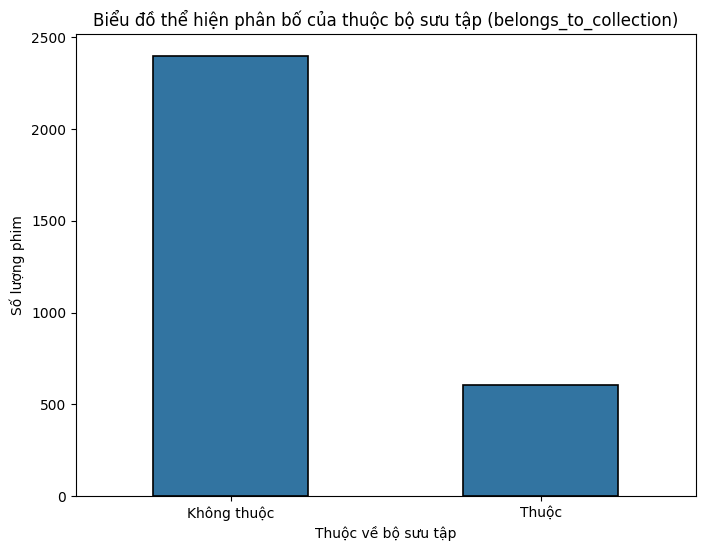

In [16]:
belongs_to_collection = df["belongs_to_collection"].apply(lambda x: 1 if x != {} else 0).value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=belongs_to_collection.index, y=belongs_to_collection.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện phân bố của thuộc bộ sưu tập (belongs_to_collection)")
plt.xticks(ticks=range(len(belongs_to_collection)), labels=["Không thuộc", "Thuộc"])
plt.xlabel("Thuộc về bộ sưu tập")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Số lượng phim không thuộc bộ sưu tập nào cao hơn đáng kể so với số lượng phim thuộc bộ sưu tập.

#### Biểu đồ thể hiện phân bố của trang chủ **(`homepage`)**

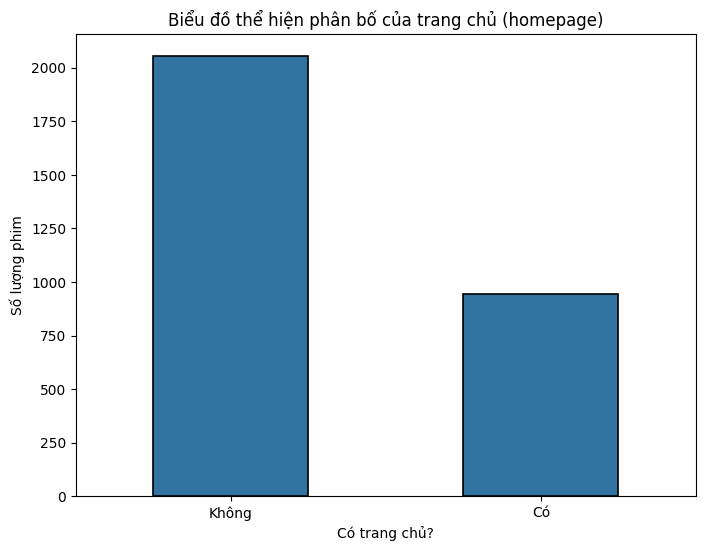

In [17]:
homepage = df["homepage"].notnull().astype(int).value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=homepage.index, y=homepage.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện phân bố của trang chủ (homepage)")
plt.xticks(ticks=range(len(homepage)), labels=["Không", "Có"])
plt.xlabel("Có trang chủ?")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Số lượng phim không có trang chủ cao gấp hơn 2 lần so với số lượng phim có trang chủ.

#### Phân bố của poster phim **(`poster_path`)**

In [18]:
poster_path = df["poster_path"].notnull().astype(int).value_counts()
poster_path

1    2999
0       1
Name: poster_path, dtype: int64

Nhận xét:
- Hầu hết các bộ phim đều có đường dẫn poster quảng cáo.

#### Phân bố của tình trạng phim **(`status`)**

In [19]:
status = df["status"].value_counts()
status

Released    2996
Rumored        4
Name: status, dtype: int64

Nhận xét:
- Hầu hết các bộ phim đều đã phát hành.

#### Biểu đồ thể hiện top 10 ngôn ngữ chính của phim **`(original_language)`**

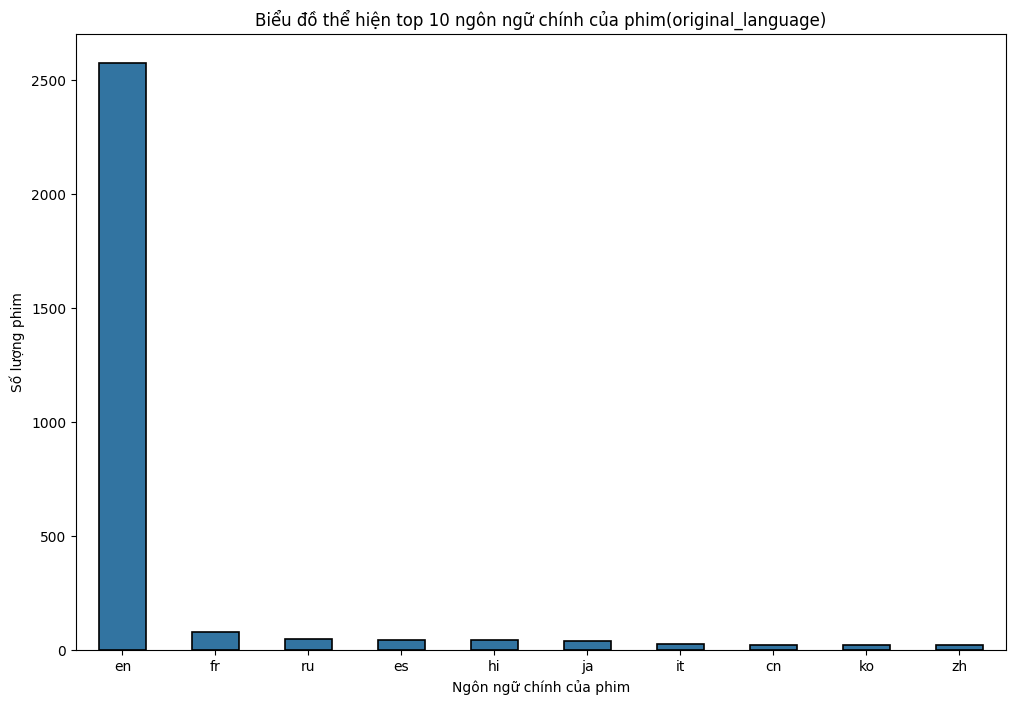

In [20]:
original_language = df["original_language"].value_counts()[:10]
plt.figure(figsize=(12, 8))
sns.barplot(x=original_language.index, y=original_language.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện top 10 ngôn ngữ chính của phim(original_language)")
plt.xticks(ticks=range(len(original_language)))
plt.xlabel("Ngôn ngữ chính của phim")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Ngôn ngữ gốc phổ biến nhất trong các bộ phim là tiếng Anh (EN), chiếm đa số với 2575 bộ phim.
- Trong khi đó, các ngôn ngữ khác như tiếng Pháp (FR), tiếng Nga (RU), tiếng Tây Ban Nha (ES), tiếng Hindi (HI), và tiếng Nhật (JA) có số lượng ít hơn nhiều, lần lượt là 78, 47, 43, 42, và 37 bộ phim.
- Sự chênh lệch này cho thấy ưu thế của tiếng Anh trong ngành công nghiệp điện ảnh và sự phổ biến của các bộ phim tiếng Anh so với các ngôn ngữ khác.

#### Biểu đồ thể hiện top 10 thể loại phim **`(genres)`**

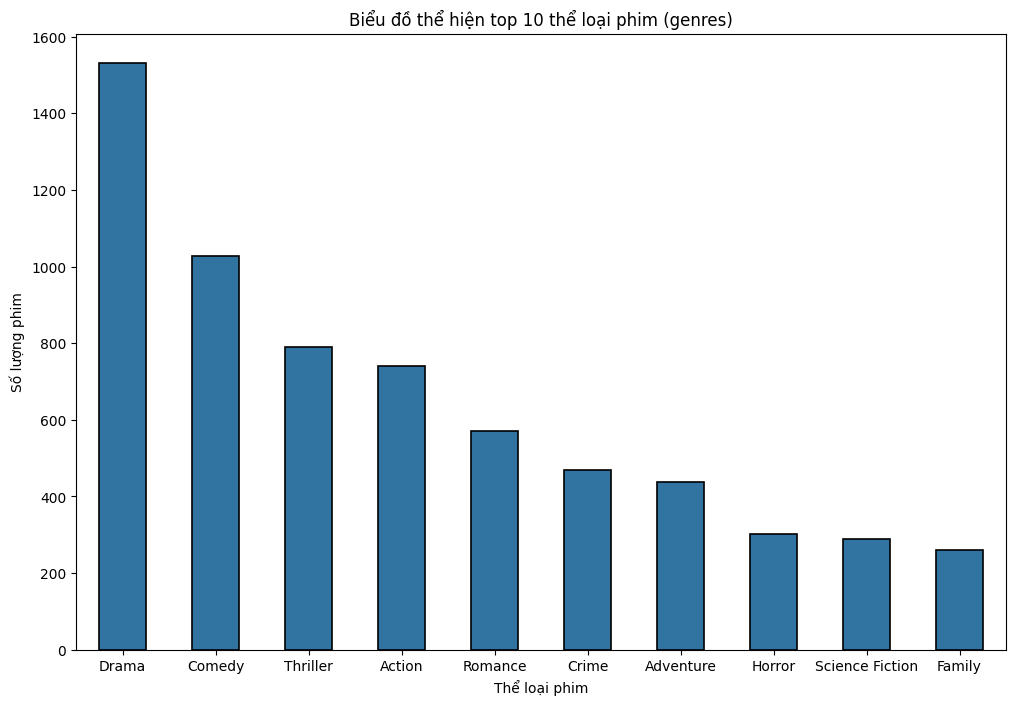

In [21]:
genres = df["genres"].apply(lambda x: [names["name"] for names in x])
genres = genres.explode().value_counts()[:10]

plt.figure(figsize=(12, 8))
sns.barplot(x=genres.index, y=genres.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.xticks(ticks=range(len(genres)))
plt.title("Biểu đồ thể hiện top 10 thể loại phim (genres)")
plt.xlabel("Thể loại phim")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Drama là thể loại phổ biến nhất với 1531 bộ phim, tiếp theo là Comedy với 1028 bộ phim.
- Thriller và Action cũng chiếm vị trí quan trọng với số lượng lần lượt là 789 và 741 bộ phim.
- Trong khi đó, Romance, Crime, Adventure, Horror, Science Fiction và Family cũng đóng góp vào đa dạng của ngành công nghiệp phim, với số lượng bộ phim từ 260 đến 571.
- Các thể loại này thường đề cập đến những chủ đề và cốt truyện khác nhau, phản ánh sự đa dạng của sở thích và sở thích của khán giả.

#### Biểu đồ thể hiện top 10 công ty sản xuất phim nhiều nhất **`(production_companies)`**

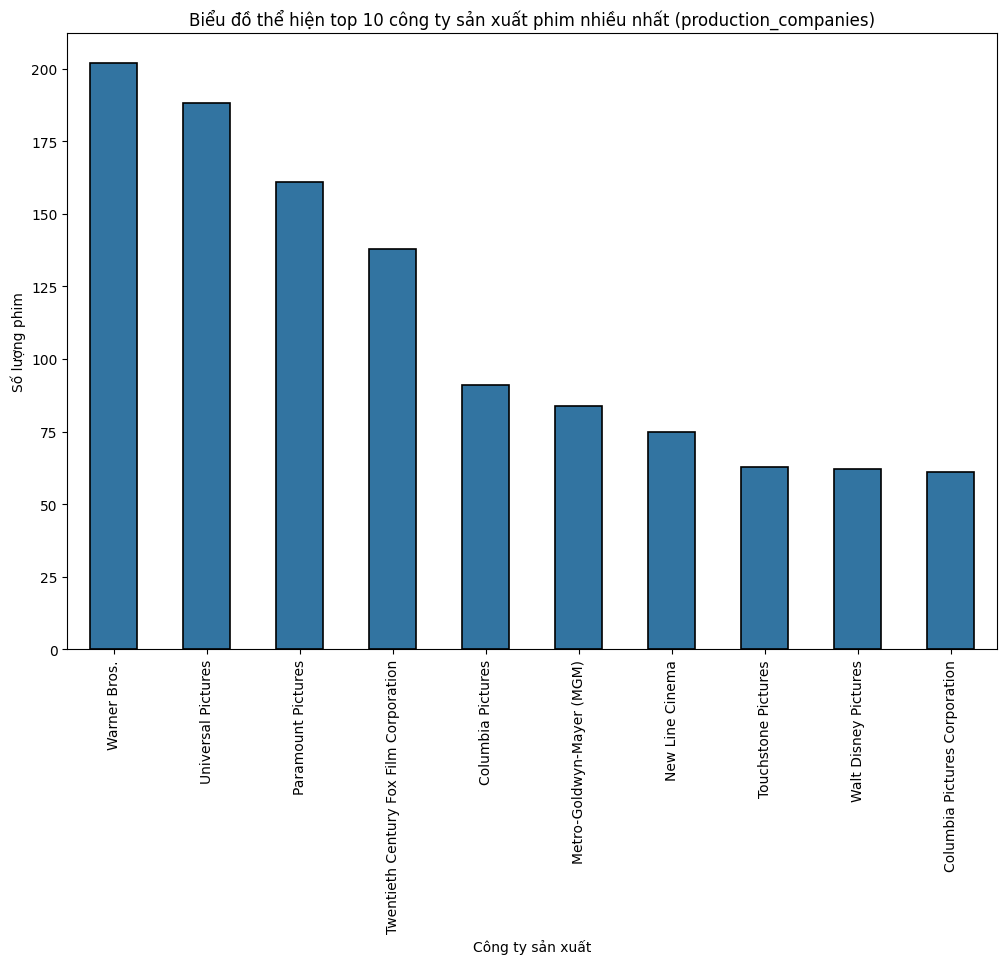

In [22]:
production_companies = df["production_companies"].apply(lambda x: [names["name"] for names in x])
production_companies = production_companies.explode().value_counts()[:10]

plt.figure(figsize=(12, 8))
sns.barplot(x=production_companies.index, y=production_companies.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.xticks(ticks=range(len(production_companies)), rotation=90)
plt.title("Biểu đồ thể hiện top 10 công ty sản xuất phim nhiều nhất (production_companies)")
plt.xlabel("Công ty sản xuất")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Các công ty sản xuất phim hàng đầu như Warner Bros., Universal Pictures và Paramount Pictures đóng vai trò quan trọng trong ngành công nghiệp điện ảnh, với số lượng bộ phim sản xuất nhiều nhất.
- Các công ty này thường có ảnh hưởng lớn đến thị trường và đóng góp vào sự đa dạng của ngành công nghiệp phim.
- Cả 10 công ty sản xuất phim nhiều nhất đều đến từ nước Mỹ.

#### Biểu đồ thể hiện top 10 đất nước sản xuất phim nhiều nhất **`(production_countries)`**

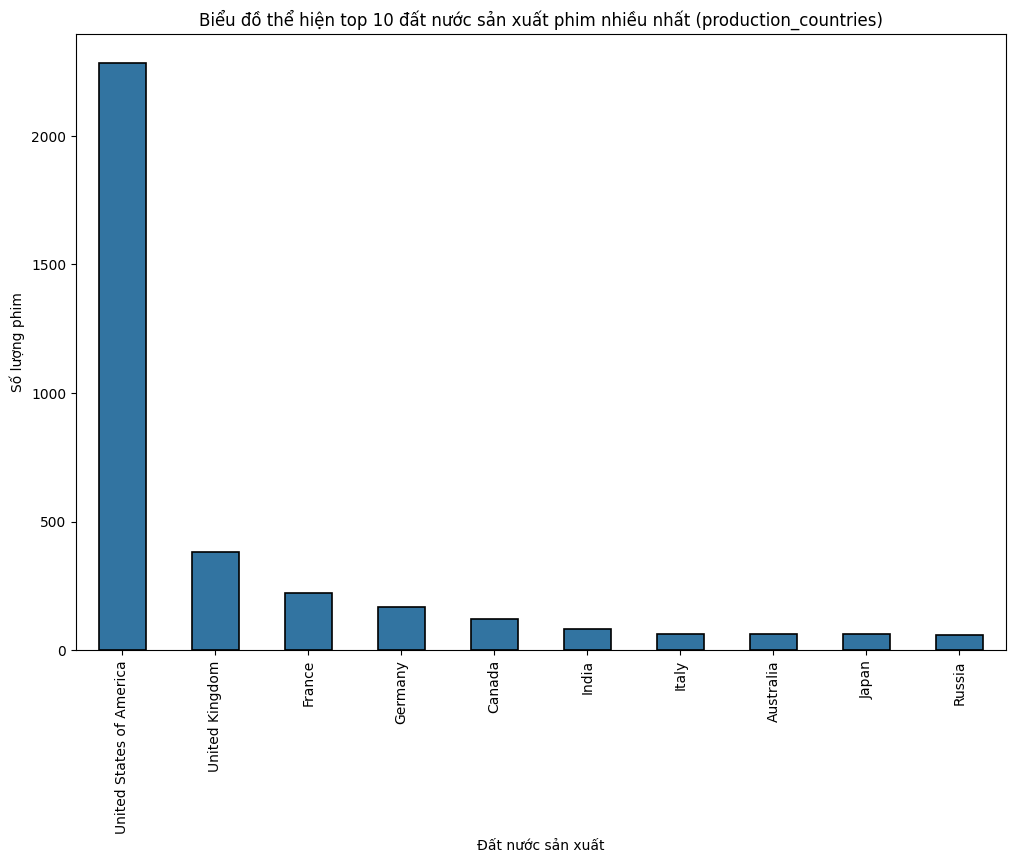

In [23]:
production_countries = df["production_countries"].apply(lambda x: [names["name"] for names in x])
production_countries = production_countries.explode().value_counts()[:10]

plt.figure(figsize=(12, 8))
sns.barplot(x=production_countries.index, y=production_countries.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.xticks(ticks=range(len(production_countries)), rotation=90)
plt.title("Biểu đồ thể hiện top 10 đất nước sản xuất phim nhiều nhất (production_countries)")
plt.xlabel("Đất nước sản xuất")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Mỹ (United States of America) là quốc gia sản xuất phim hàng đầu, với 2282 bộ phim, chiếm đa số so với các quốc gia khác.
- Các quốc gia như Anh (United Kingdom), Pháp (France), và Đức (Germany) cũng có sự đóng góp đáng kể vào ngành công nghiệp phim, nhưng số lượng bộ phim sản xuất ít hơn nhiều so với Mỹ.
- Các quốc gia khác như Canada, Ấn Độ, Ý, Úc, Nhật Bản và Nga cũng tham gia sản xuất phim, nhưng với số lượng ít hơn so với các quốc gia chính.
- Điều này cho thấy ảnh hưởng lớn của Mỹ trong ngành công nghiệp điện ảnh, với sự đóng góp lớn vào việc sản xuất các bộ phim trên toàn thế giới.

#### Biểu đồ thể hiện top 10 ngôn ngữ được sử dụng nhiểu nhất trong phim **`(spoken_languages)`**

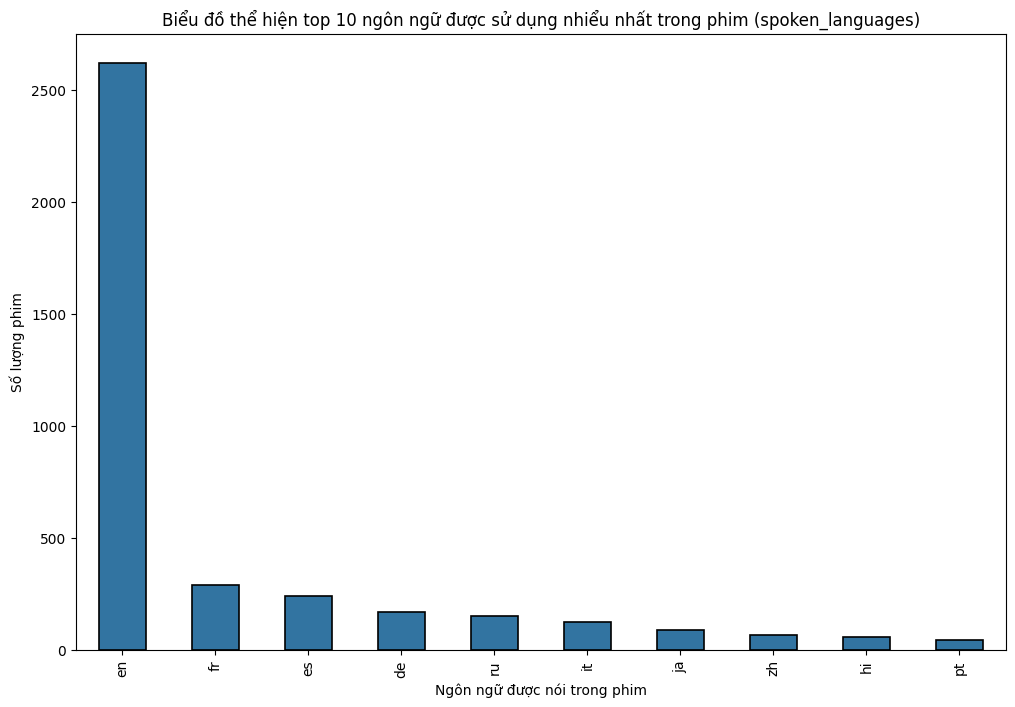

In [24]:
spoken_languages = df["spoken_languages"].apply(lambda x: [names["iso_639_1"] for names in x])
spoken_languages = spoken_languages.explode().value_counts()[:10]

plt.figure(figsize=(12, 8))
sns.barplot(x=spoken_languages.index, y=spoken_languages.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.xticks(ticks=range(len(spoken_languages)), rotation=90)
plt.title("Biểu đồ thể hiện top 10 ngôn ngữ được sử dụng nhiểu nhất trong phim (spoken_languages)")
plt.xlabel("Ngôn ngữ được nói trong phim")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Tiếng Anh (EN) là ngôn ngữ phổ biến nhất trong các bộ phim, với 2618 bộ phim sử dụng.
- Tiếng Pháp (FR) và tiếng Tây Ban Nha (ES) cũng chiếm vị trí quan trọng với số lượng lần lượt là 288 và 239 bộ phim.
- Trong khi đó, tiếng Đức (DE), tiếng Nga (RU), và tiếng Ý (IT) cũng có sự đóng góp đáng kể với số lượng bộ phim từ 124 đến 169.
- Tiếng Nhật (JA) và tiếng Trung (ZH) cũng xuất hiện trong top 10 với số lượng bộ phim ít hơn.
- Tiếng Hindi (HI) và tiếng Bồ Đào Nha (PT) là hai ngôn ngữ cuối cùng trong top 10, với số lượng bộ phim ít nhất.
- Sự đa dạng về ngôn ngữ trong ngành công nghiệp phim phản ánh nhu cầu và sở thích của khán giả trên toàn cầu.

#### Biểu đồ thể hiện top 20 từ khóa được sử dụng nhiểu nhất trong phim **`(Keywords)`**

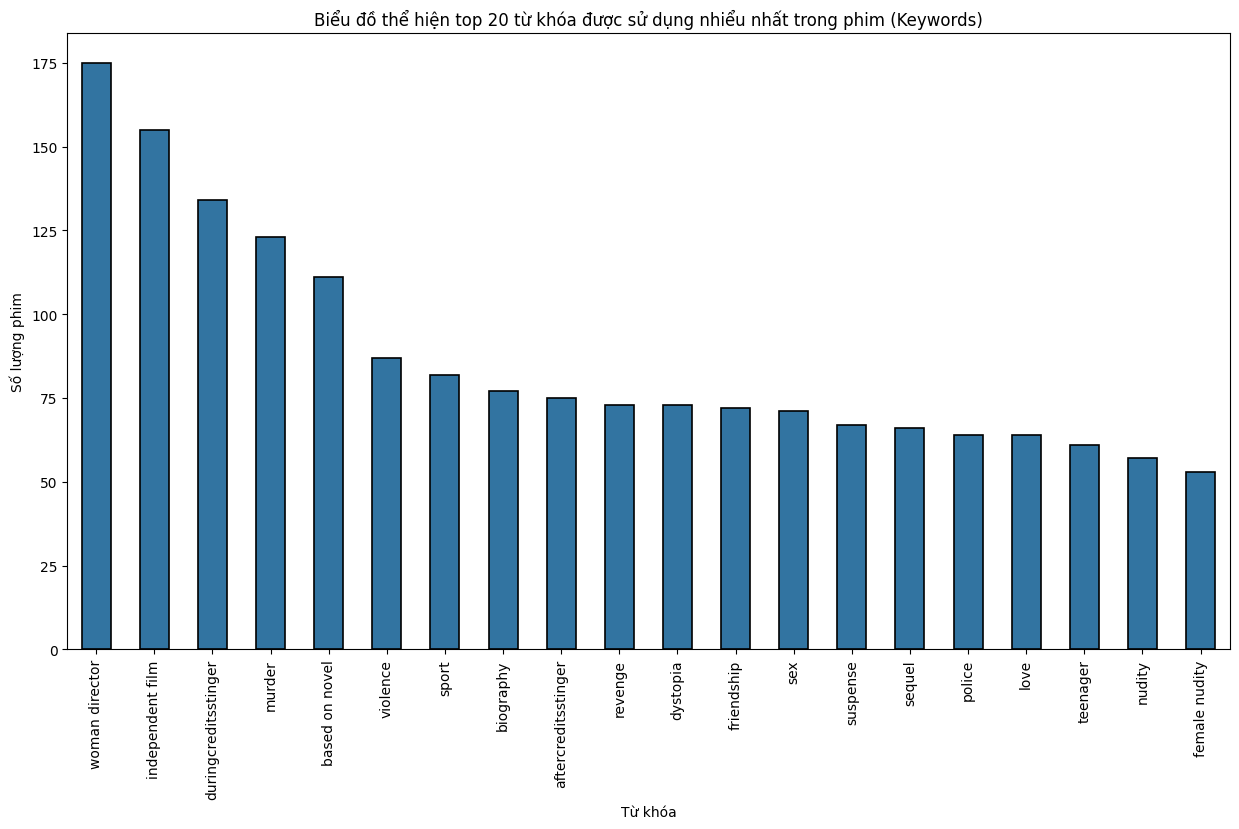

In [25]:
Keywords = df["Keywords"].apply(lambda x: [names["name"] for names in x])
Keywords = Keywords.explode().value_counts()[:20]

plt.figure(figsize=(15, 8))
sns.barplot(x=Keywords.index, y=Keywords.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.xticks(ticks=range(len(Keywords)), rotation=90)
plt.title("Biểu đồ thể hiện top 20 từ khóa được sử dụng nhiểu nhất trong phim (Keywords)")
plt.xlabel("Từ khóa")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Một số từ khóa phổ biến trong các bộ phim, như "woman director", "independent film", và "duringcreditsstinger" có số lượt xuất hiện nhiều nhất, từ 175 đến 134.
- Các từ khóa như "murder", "based on novel", và "violence" cũng chiếm vị trí quan trọng trong top 20, với số lượng xuất hiện từ 87 đến 123.
- Các từ khóa như "friendship", "love", và "revenge" cũng thường xuyên xuất hiện trong các bộ phim.
- Tuy nhiên, cần lưu ý rằng sự xuất hiện nhiều của một từ khóa không nhất thiết phản ánh chất lượng của bộ phim, mà có thể chỉ là các yếu tố phổ biến trong các thể loại phim. Đánh giá chính xác về một bộ phim nên dựa trên nhiều yếu tố hơn chỉ là các từ khóa.

#### Biểu đồ thể hiện top 20 diễn viên tham gia phim nhiều nhất **`(cast)`**

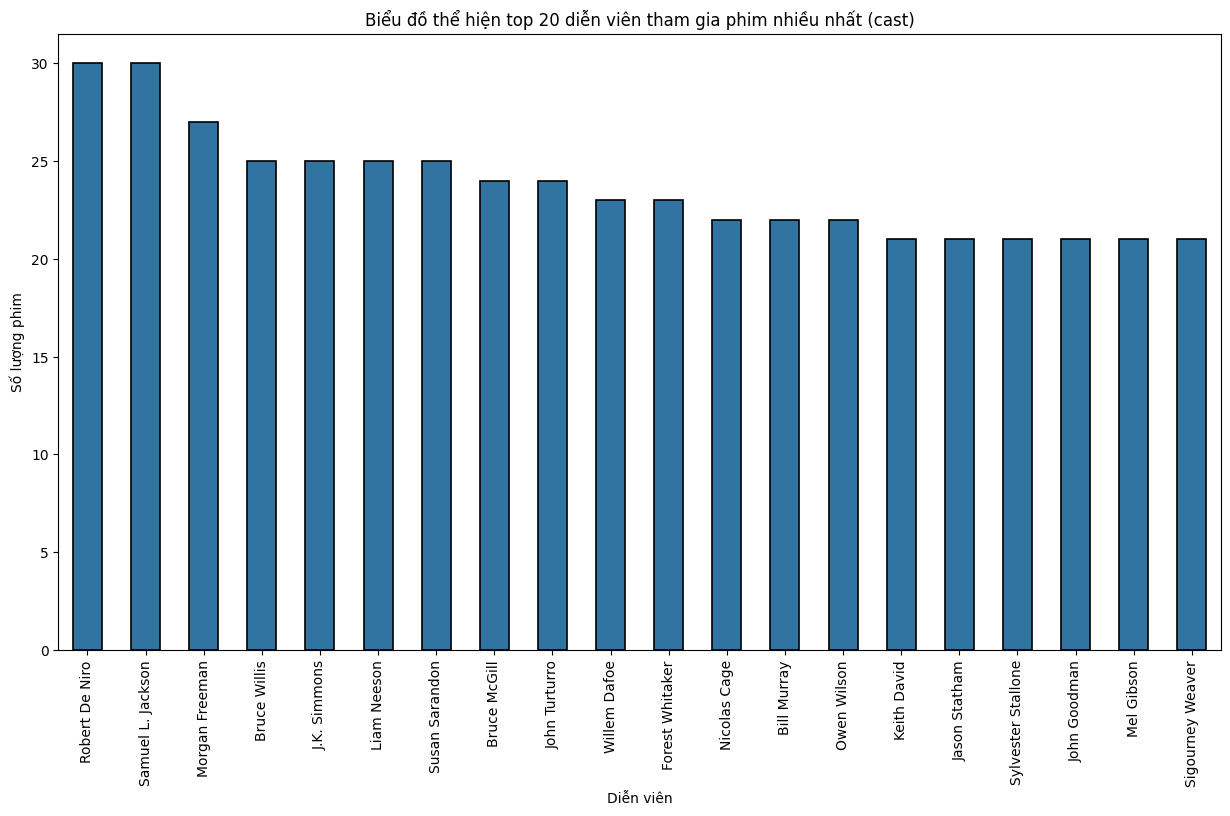

In [26]:
cast = df["cast"].apply(lambda x: [names["name"] for names in x])
cast = cast.explode().value_counts()[:20]

plt.figure(figsize=(15, 8))
sns.barplot(x=cast.index, y=cast.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.xticks(ticks=range(len(cast)), rotation=90)
plt.title("Biểu đồ thể hiện top 20 diễn viên tham gia phim nhiều nhất (cast)")
plt.xlabel("Diễn viên")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Diễn viên `Robert De Niro` và `Samuel L. Jackson` đóng nhiều phim nhất.

#### Biểu đồ thể hiện top 20 thành viên tham gia sản xuất phim nhiều nhất **`(crew)`**

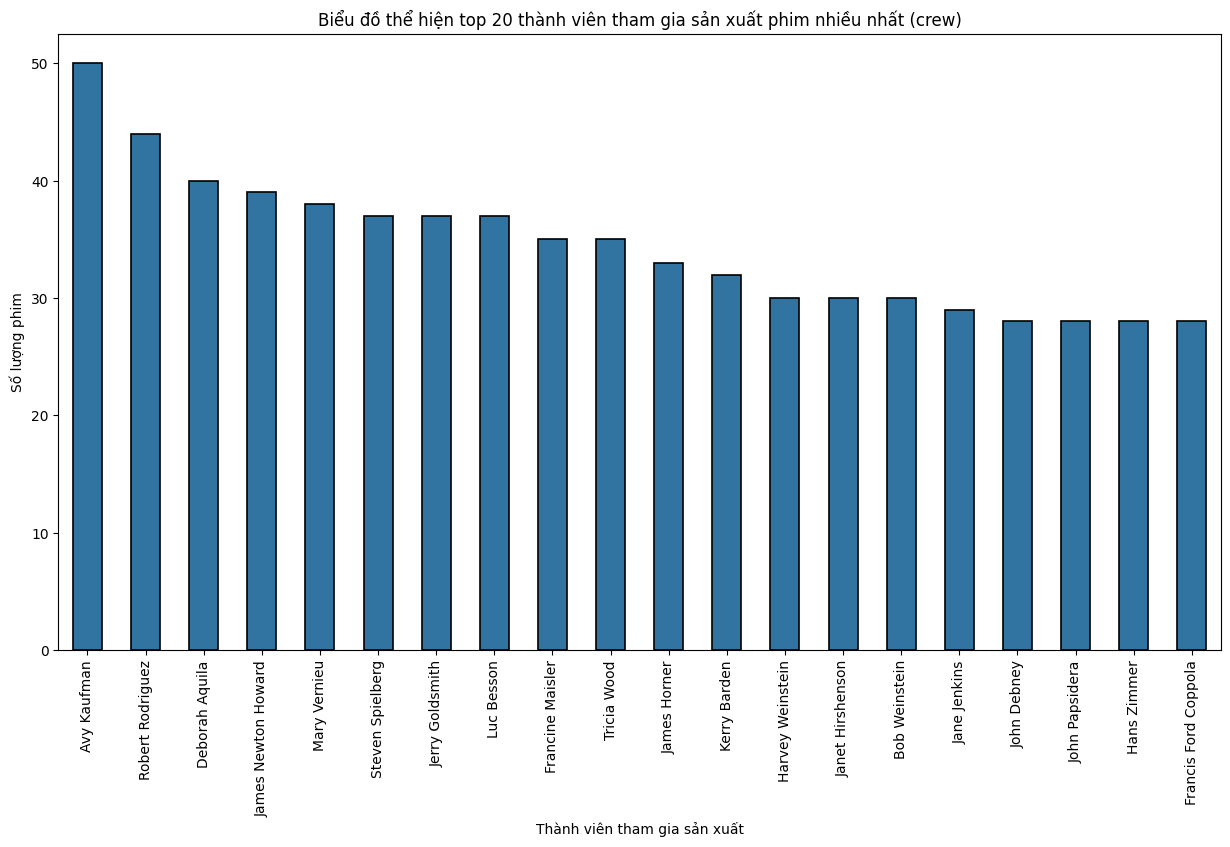

In [27]:
crew = df["crew"].apply(lambda x: [names["name"] for names in x])
crew = crew.explode().value_counts()[:20]

plt.figure(figsize=(15, 8))
sns.barplot(x=crew.index, y=crew.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.xticks(ticks=range(len(crew)), rotation=90)
plt.title("Biểu đồ thể hiện top 20 thành viên tham gia sản xuất phim nhiều nhất (crew)")
plt.xlabel("Thành viên tham gia sản xuất")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Avy Kaufman là thành viên sản xuất tham gia nhiều phim nhất.

#### Những từ xuất hiện trong tóm tắt phim nhiều nhất **`(overview)`**

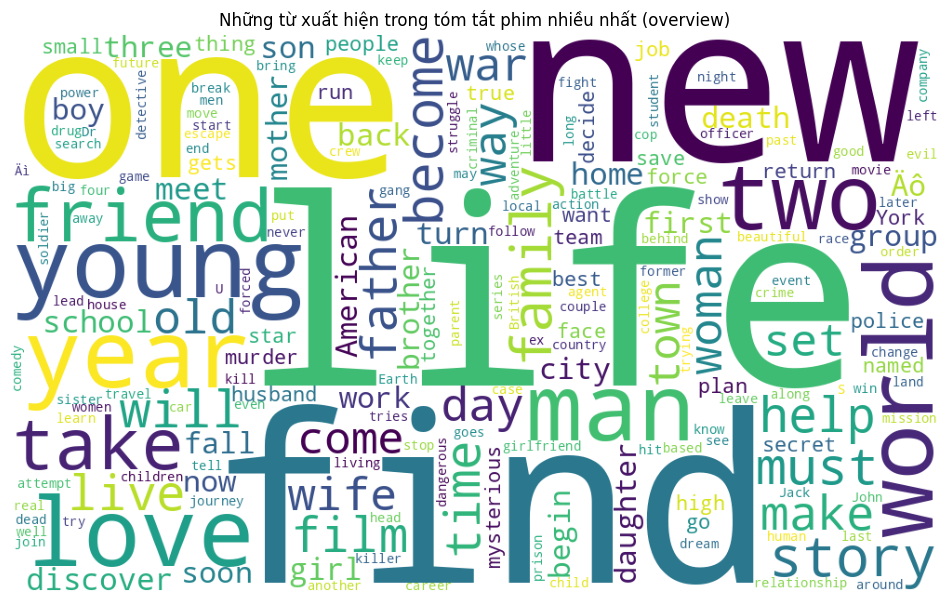

In [28]:
overview = " ".join(df["overview"].apply(lambda x: x if x is not np.nan else ""))

plt.figure(figsize = (12, 8))
wordcloud = WordCloud(max_font_size=None, collocations=False, background_color="white", width=1000, height=600).generate(overview)
plt.imshow(wordcloud)
plt.title("Những từ xuất hiện trong tóm tắt phim nhiều nhất (overview)")
plt.axis("off")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

#### Những từ xuất hiện trong tiêu đề phim gốc nhiều nhất **`(original_title)`**

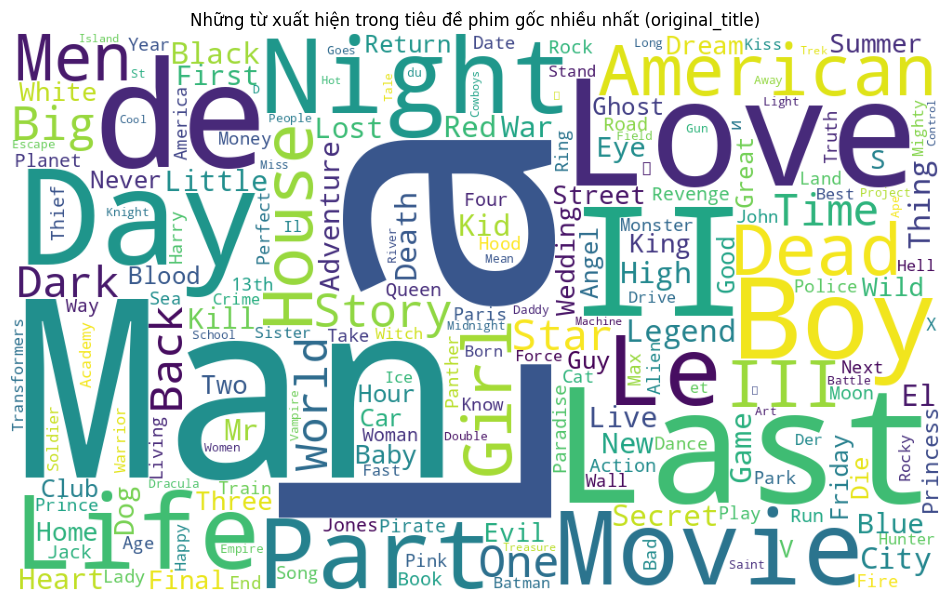

In [29]:
original_title = " ".join(df["original_title"].apply(lambda x: x if x is not np.nan else ""))

plt.figure(figsize = (12, 8))
wordcloud = WordCloud(max_font_size=None, collocations=False, background_color="white", width=1000, height=600).generate(original_title)
plt.imshow(wordcloud)
plt.title("Những từ xuất hiện trong tiêu đề phim gốc nhiều nhất (original_title)")
plt.axis("off")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

#### Những từ xuất hiện trong khẩu hiệu phim nhiều nhất **`(tagline)`**

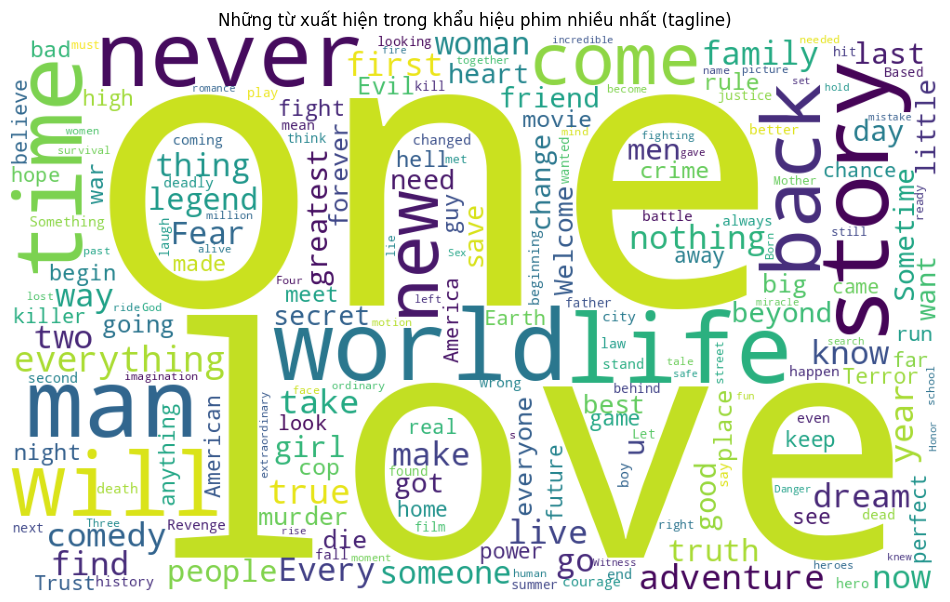

In [30]:
tagline = " ".join(df["tagline"].apply(lambda x: x if x is not np.nan else ""))

plt.figure(figsize = (12, 8))
wordcloud = WordCloud(max_font_size=None, collocations=False, background_color="white", width=1000, height=600).generate(tagline)
plt.imshow(wordcloud)
plt.title("Những từ xuất hiện trong khẩu hiệu phim nhiều nhất (tagline)")
plt.axis("off")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

#### Những từ xuất hiện trong tiêu đề phim nhiều nhất **`(title)`**

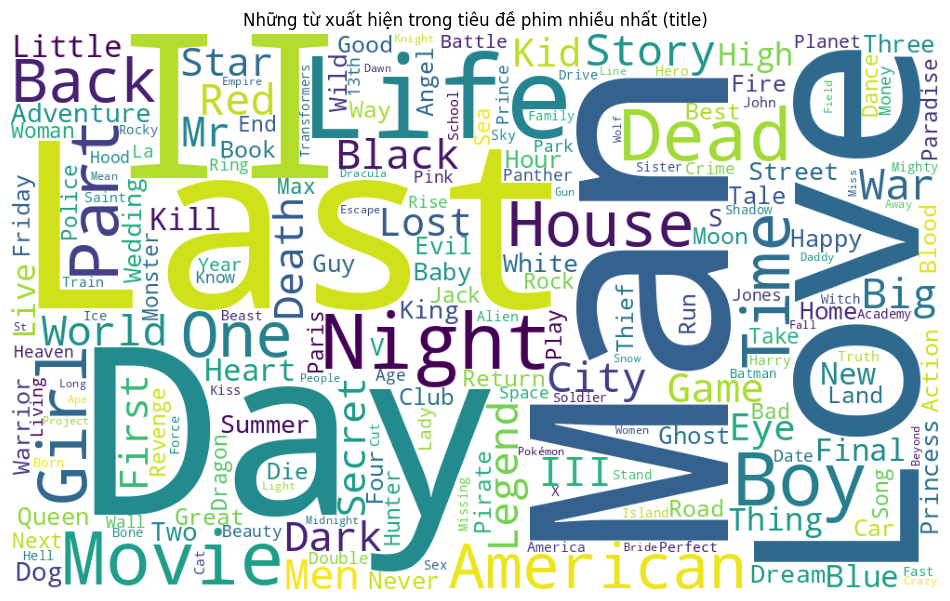

In [31]:
title = " ".join(df["title"].apply(lambda x: x if x is not np.nan else ""))

plt.figure(figsize = (12, 8))
wordcloud = WordCloud(max_font_size=None, collocations=False, background_color="white", width=1000, height=600).generate(title)
plt.imshow(wordcloud)
plt.title("Những từ xuất hiện trong tiêu đề phim nhiều nhất (title)")
plt.axis("off")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

#### Biểu đồ thể hiện năm ra mắt phim **`(release_year)`**

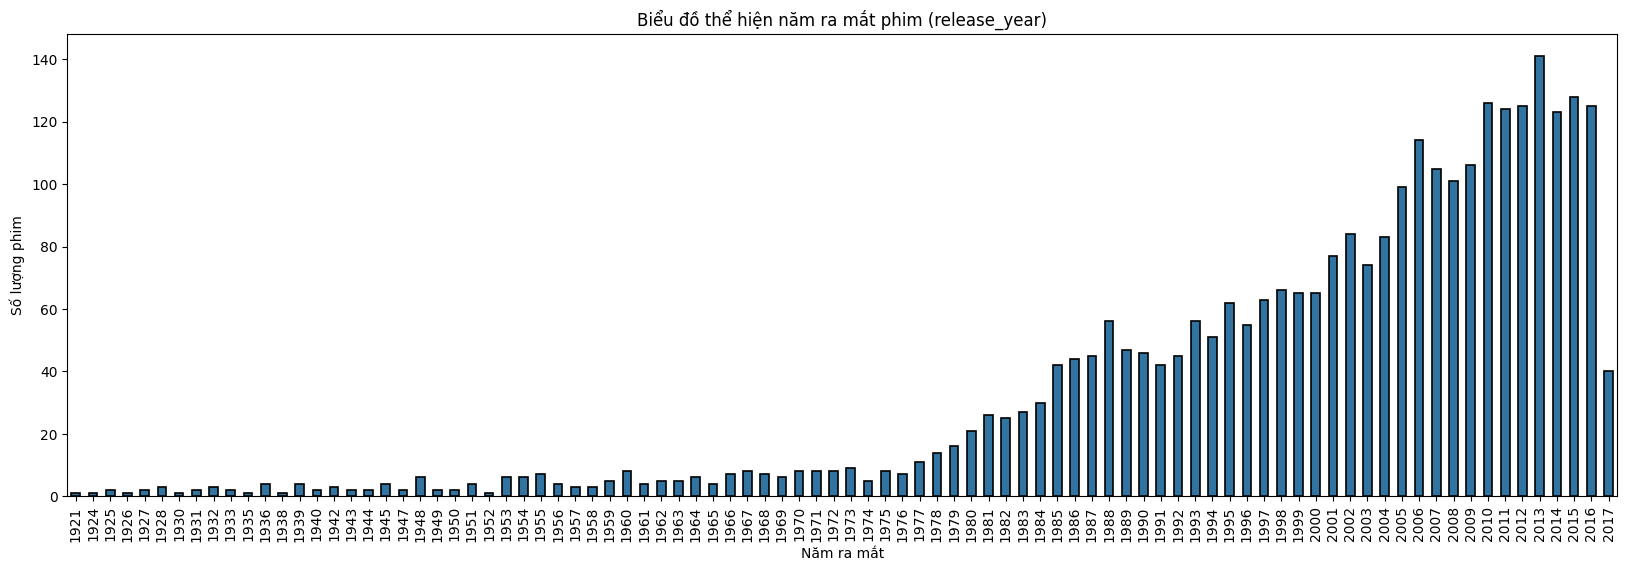

In [32]:
plt.figure(figsize=(20, 6))
sns.barplot(x=release_year.index, y=release_year.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện năm ra mắt phim (release_year)")
plt.xticks(ticks=range(len(release_year)), rotation=90)
plt.xlabel("Năm ra mắt")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Càng về sau số lượng phim ra mắt ngày càng tăng.

#### Biểu đồ thể hiện tháng ra mắt phim **`(release_month)`**

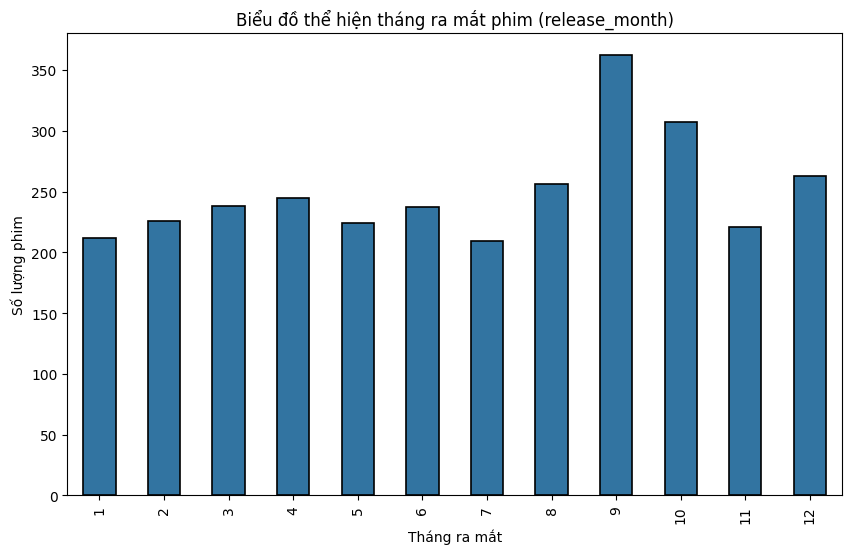

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=release_month.index, y=release_month.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện tháng ra mắt phim (release_month)")
plt.xticks(ticks=range(len(release_month)), rotation=90)
plt.xlabel("Tháng ra mắt")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Tháng 9 và tháng 10 có số lượng phim ra mắt sẽ nhỉnh hơn một ít so với phần còn lại.
- Các tháng khác có số lượng phim ra mắt tương đối đều nhau.

#### Biểu đồ thể hiện ngày ra mắt phim **`(release_day)`**

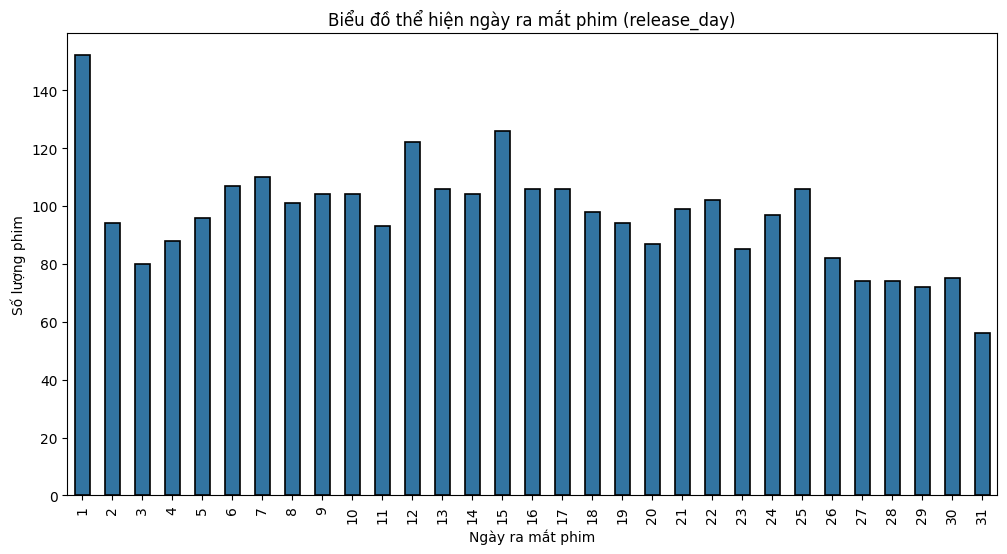

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=release_day.index, y=release_day.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện ngày ra mắt phim (release_day)")
plt.xticks(ticks=range(len(release_day)), rotation=90)
plt.xlabel("Ngày ra mắt phim")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Số lượng phim ra mắt tương đối đều các ngày trong tháng.

#### Biểu đồ thể hiện quý ra mắt **`(release_quarter)`**

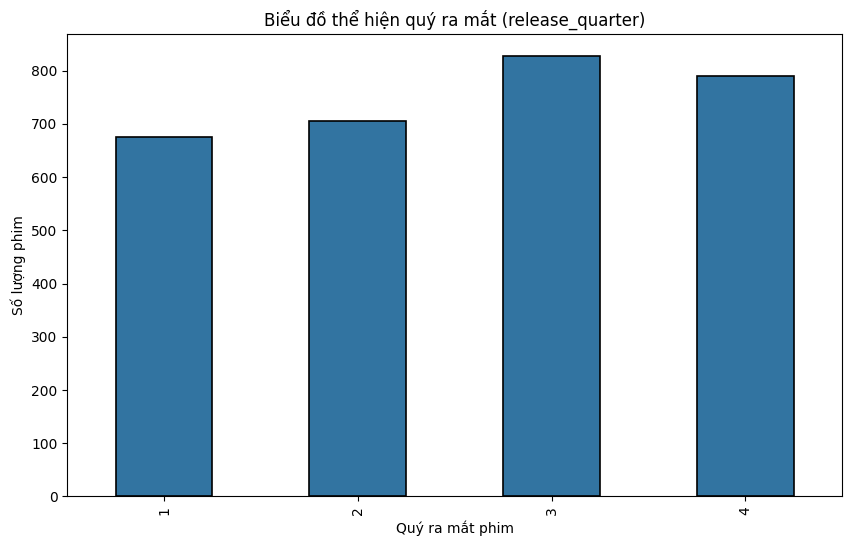

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=release_quarter.index, y=release_quarter.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện quý ra mắt (release_quarter)")
plt.xticks(ticks=range(len(release_quarter)), rotation=90)
plt.xlabel("Quý ra mắt phim")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Số lượng phim ra mắt đều các quý trong năm.

#### Biểu đồ thể hiện ngày trong tuần ra mắt phim **`(release_dayofweek)`**

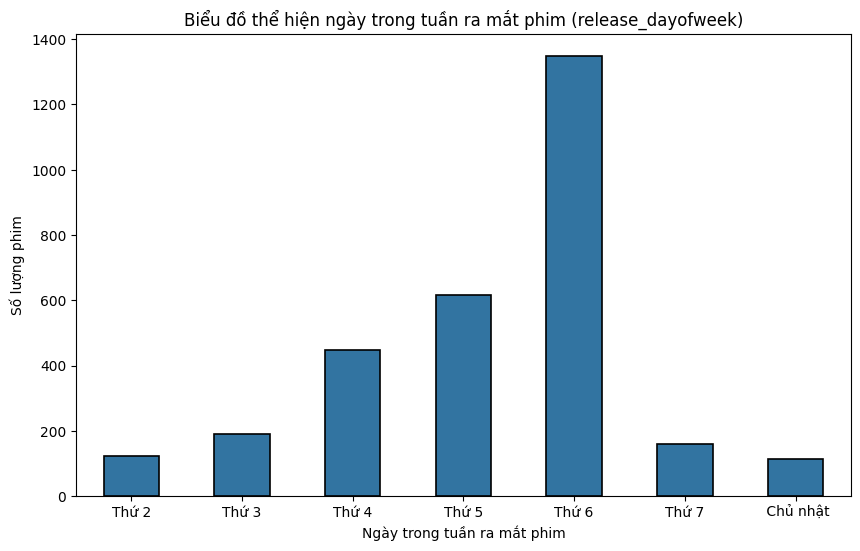

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x=release_dayofweek.index, y=release_dayofweek.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện ngày trong tuần ra mắt phim (release_dayofweek)")
labels_release_dayofweek = ["Thứ 2", "Thứ 3", "Thứ 4", "Thứ 5",
                            "Thứ 6", "Thứ 7", " Chủ nhật"]
plt.xticks(ticks=range(len(release_dayofweek)), labels=labels_release_dayofweek)
plt.xlabel("Ngày trong tuần ra mắt phim")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Thứ 4, 5, 6 là những ngày có số lượng phim ra mắt vượt trội so với các ngày còn lại. Đặc biệt nhất đó là thứ 6.

#### Biểu đồ thể hiện phân phối kinh phí sản xuất phim **`(budget)`**

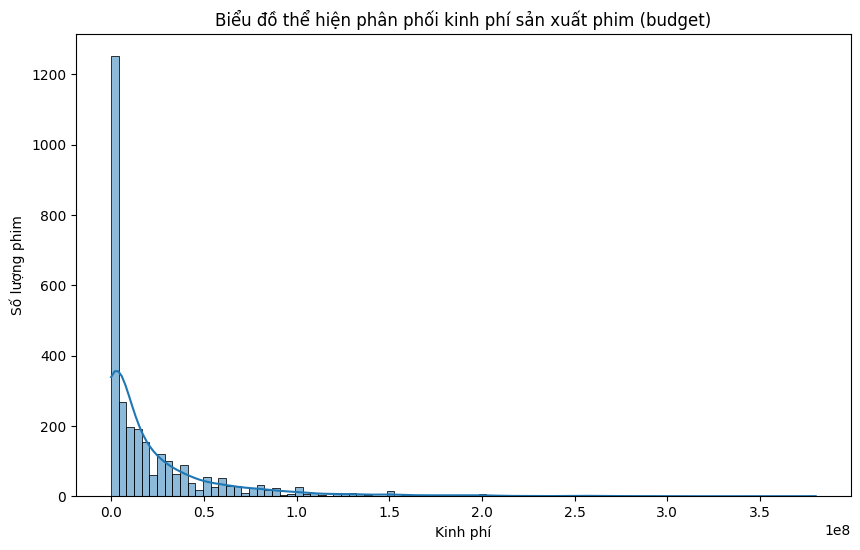

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df["budget"], kde=True, color="tab:blue")
plt.title("Biểu đồ thể hiện phân phối kinh phí sản xuất phim (budget)")
plt.xlabel("Kinh phí")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Biểu đồ bị lệch trái.
- Kinh phí phát triển phim từ 10.000.000 đến 1.000.000.000.

#### Biểu đồ thể hiện phân phối độ nổi tiếng của phim **`(popularity)`**

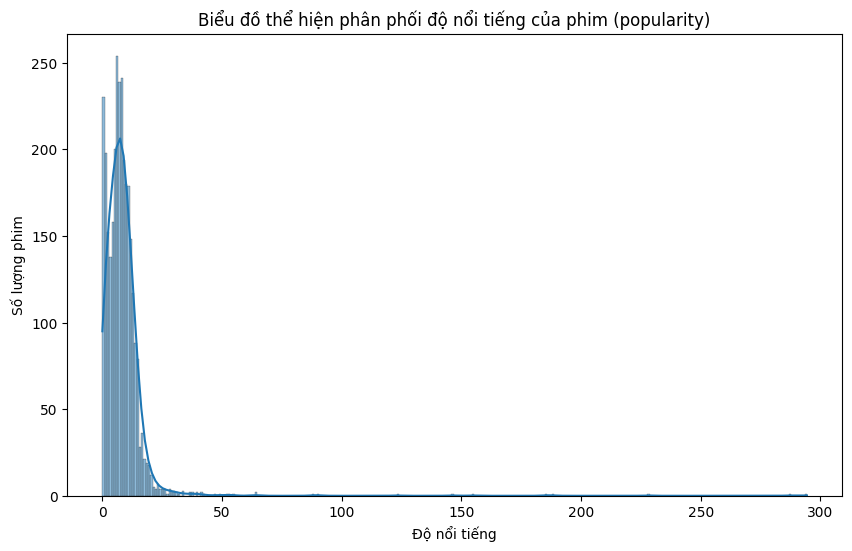

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df["popularity"], kde=True, color="tab:blue")
plt.title("Biểu đồ thể hiện phân phối độ nổi tiếng của phim (popularity)")
plt.xlabel("Độ nổi tiếng")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Biểu đồ bị lệch trái.
- Các phim có độ nổi tiếng chủ yếu từ 0 đến 50.

#### Biểu đồ thể hiện phân phối thời lượng của phim **`(runtime)`**

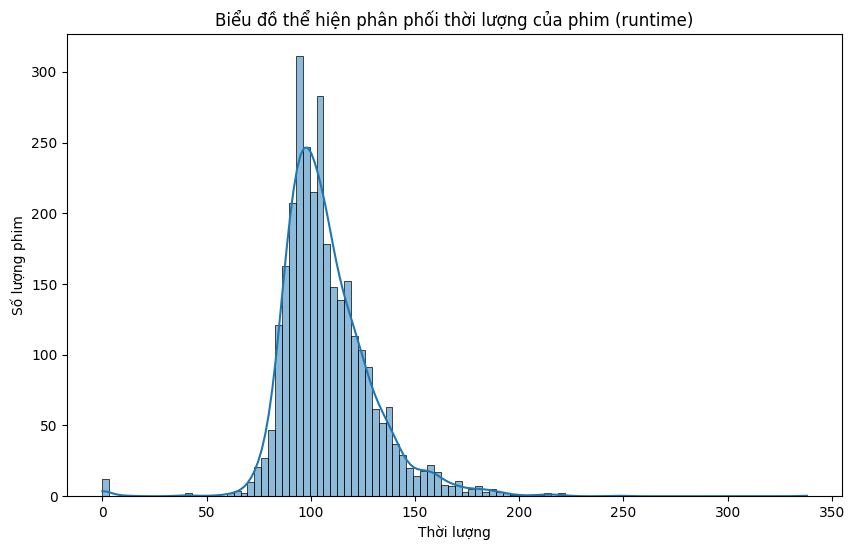

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df["runtime"], kde=True, color="tab:blue")
plt.title("Biểu đồ thể hiện phân phối thời lượng của phim (runtime)")
plt.xlabel("Thời lượng")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Biểu đồ bị lệch trái.
- Thời lượng phim kéo dài chủ yếu từ 75 phút đền 180 phút.

#### Biểu đồ thể hiện phân phối doanh thu của phim **`(revenue)`**

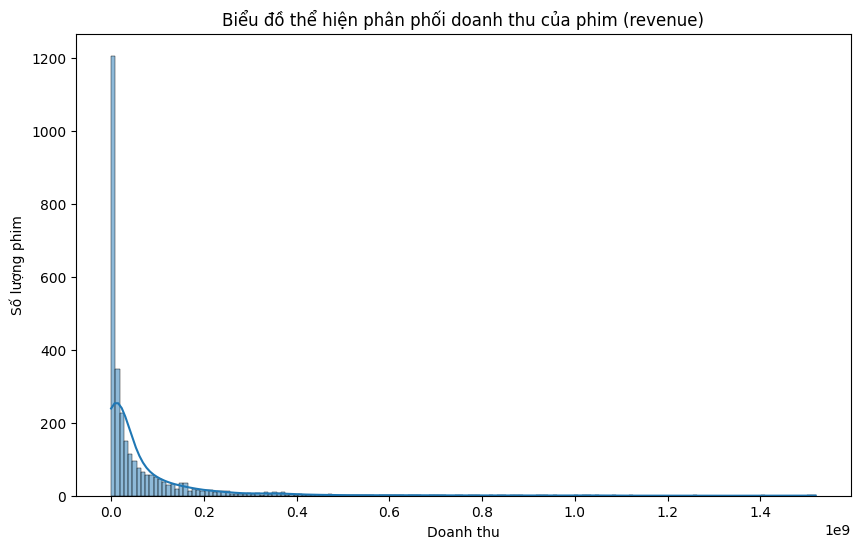

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df["revenue"], kde=True, color="tab:blue")
plt.title("Biểu đồ thể hiện phân phối doanh thu của phim (revenue)")
plt.xlabel("Doanh thu")
plt.ylabel("Số lượng phim")
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Biểu đồ bị lệch trái.
- Doanh thu bộ phim mang về từ 15.000.000 đến 800.000.000.

#### Kết luận
Từ những biểu đồ ở phía trên, ta rút ra các nhận xét:
- Số lượng phim không thuộc bộ sưu tập nào cao hơn đáng kể so với số lượng phim thuộc bộ sưu tập.
- Số lượng phim không có trang chủ cao gấp hơn 2 lần so với số lượng phim có trang chủ.
- Hầu hết các bộ phim đều có đường dẫn poster quảng cáo.
- Hầu hết các bộ phim đều đã phát hành.
- Số lượng ngôn ngữ chính của phim là tiếng Anh chiếm phần lớn.
- Theo sau là tiếng Pháp, tiếng Nga, tiếng Tây Ban Nha,... tuy nhiên số lượng chỉ chiếm phần nhỏ.
- Thể loại Drama đứng đầu với 1531 mục, cho thấy sự ưa chuộng lớn từ phía khán giả đối với dòng phim này.
- `Warner Bros.` là công ty dẫn đầu trong việc sản xuất phim.
- Mỹ là quốc gia sản xuất phim áp đảo, điều này dễ hiểu vì Mỹ từ trước đến nay được biết đến là kinh đô điện ảnh của Thế Giới và các công ty sản xuất phim hàng đầu đều là công ty Mỹ.
- Tiếng Anh là ngôn ngữ được sử dụng nhiều nhất trong phim với số lượng áp đảo khi so với các tiếng nói còn lại.
- Từ khóa "woman director" là từ khóa được sử dụng nhiều nhất.
- Diễn viên `Robert De Niro` và `Samuel L. Jackson` đóng nhiều phim nhất.
- Càng về sau số lượng phim ra mắt ngày càng tăng.
- Tháng 9 và tháng 10 có số lượng phim ra mắt sẽ nhỉnh hơn một ít so với phần còn lại.
- Số lượng phim ra mắt đều các quý trong năm.
- Số lượng phim ra mắt vào thứ 6 cao nhất trong tuần.
- Hầu hết các biểu đồ liên quan đến `Kinh phí`, `Độ nổi tiếng`, `Thời lượng` và `Doanh thu` đều bị lệch trái.
- Kinh phí phát triển phim từ 10.000.000 đến 1.000.000.000.
- Các phim có độ nổi tiếng chủ yếu từ 0 đến 50.
- Thời lượng phim kéo dài chủ yếu từ 75 phút đền 180 phút.
- Doanh thu bộ phim mang về từ 15.000.000 đến 800.000.000.

### **2.4.3.2. Phân tích 2 biến**

#### Biểu đồ thể hiện tổng kinh phí sản xuất phim qua các năm

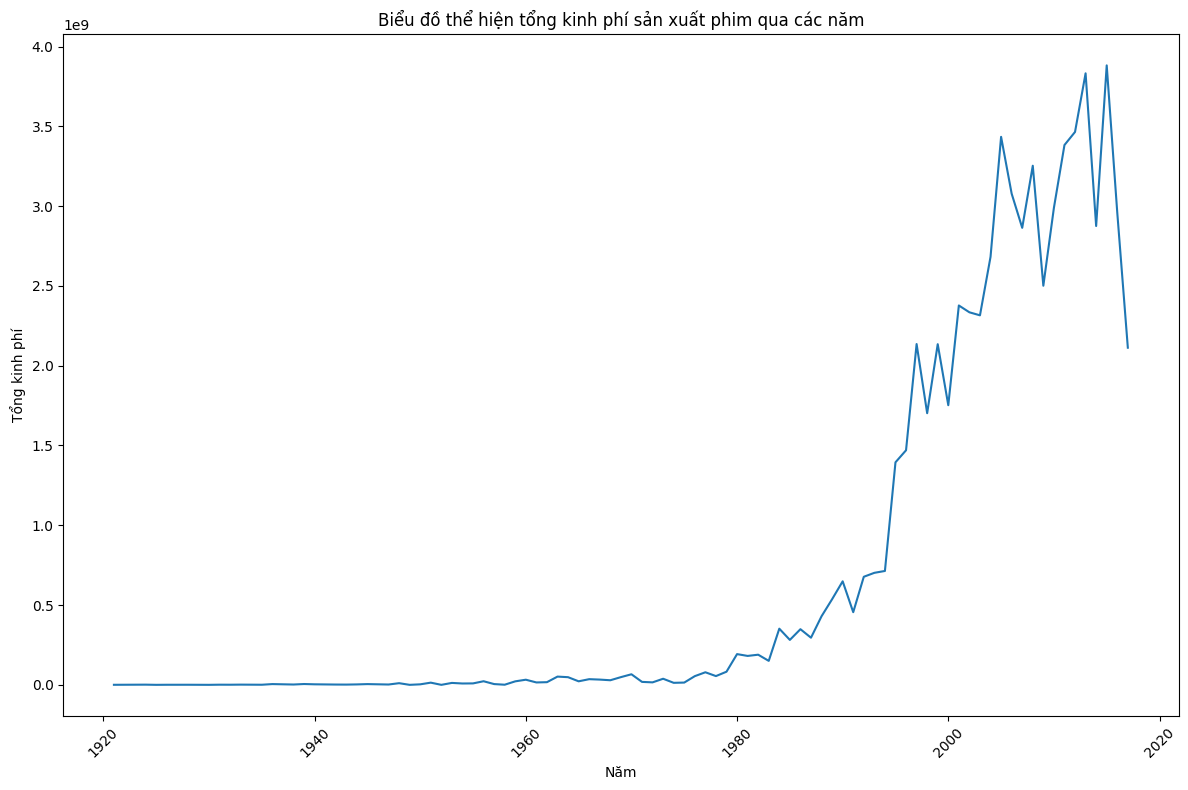

In [41]:
budget_by_year = pd.DataFrame({"release_year": release_date.dt.year, "budget": df["budget"]})
budget_by_year = budget_by_year.groupby("release_year")["budget"].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=budget_by_year, x="release_year", y="budget")
plt.title("Biểu đồ thể hiện tổng kinh phí sản xuất phim qua các năm")
plt.xlabel("Năm")
plt.ylabel("Tổng kinh phí")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Qua các năm kinh phí phim đã tăng lên rất nhiều, đặc biệt từ giai đoạn 1990.
- Đến năm 2015 có dấu hiệu giảm dần.

#### Biểu đồ thể hiện tổng doanh thu của phim qua các năm

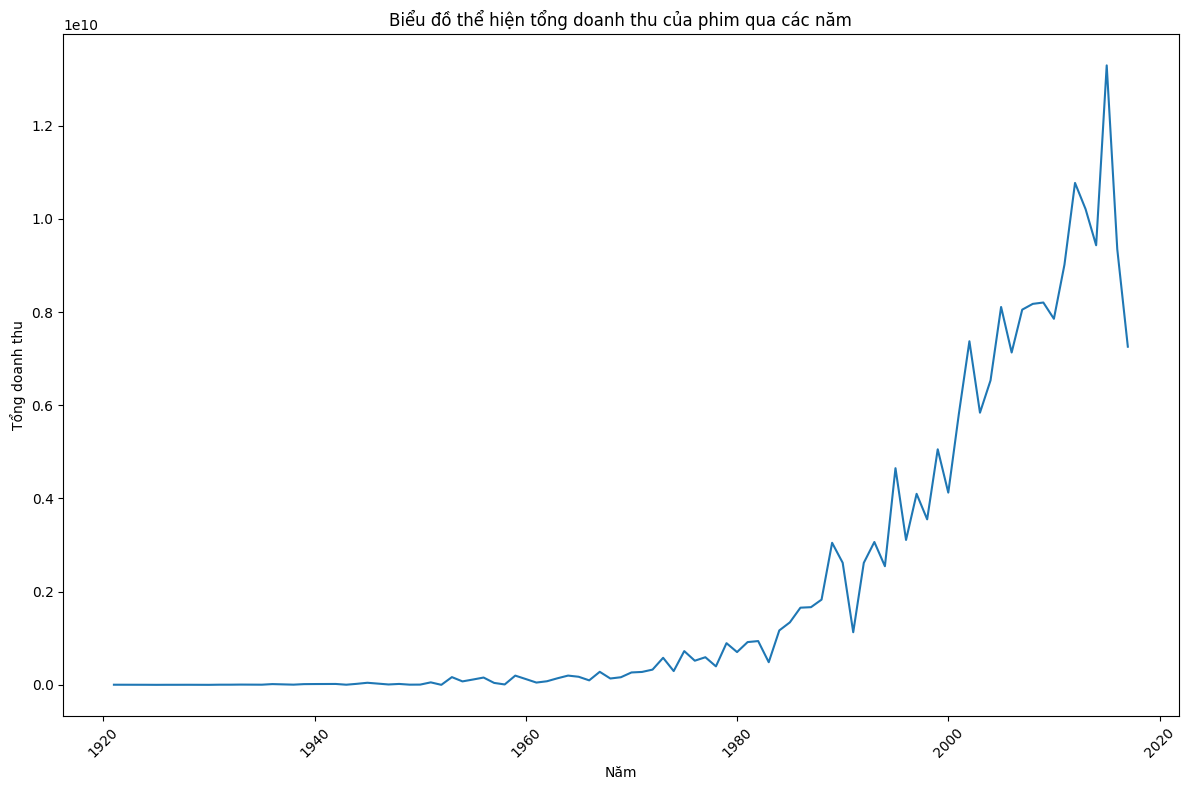

In [42]:
revenue_by_year = pd.DataFrame({"release_year": release_date.dt.year, "revenue": df["revenue"]})
revenue_by_year = revenue_by_year.groupby("release_year")["revenue"].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=revenue_by_year, x="release_year", y="revenue")
plt.title("Biểu đồ thể hiện tổng doanh thu của phim qua các năm")
plt.xlabel("Năm")
plt.ylabel("Tổng doanh thu")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Qua các năm cũng như kinh phí thì doanh thu phim đã tăng lên rất nhiều.

#### Biểu đồ thể hiện top 10 đất nước sản xuất phim mang lại doanh thu cao nhất

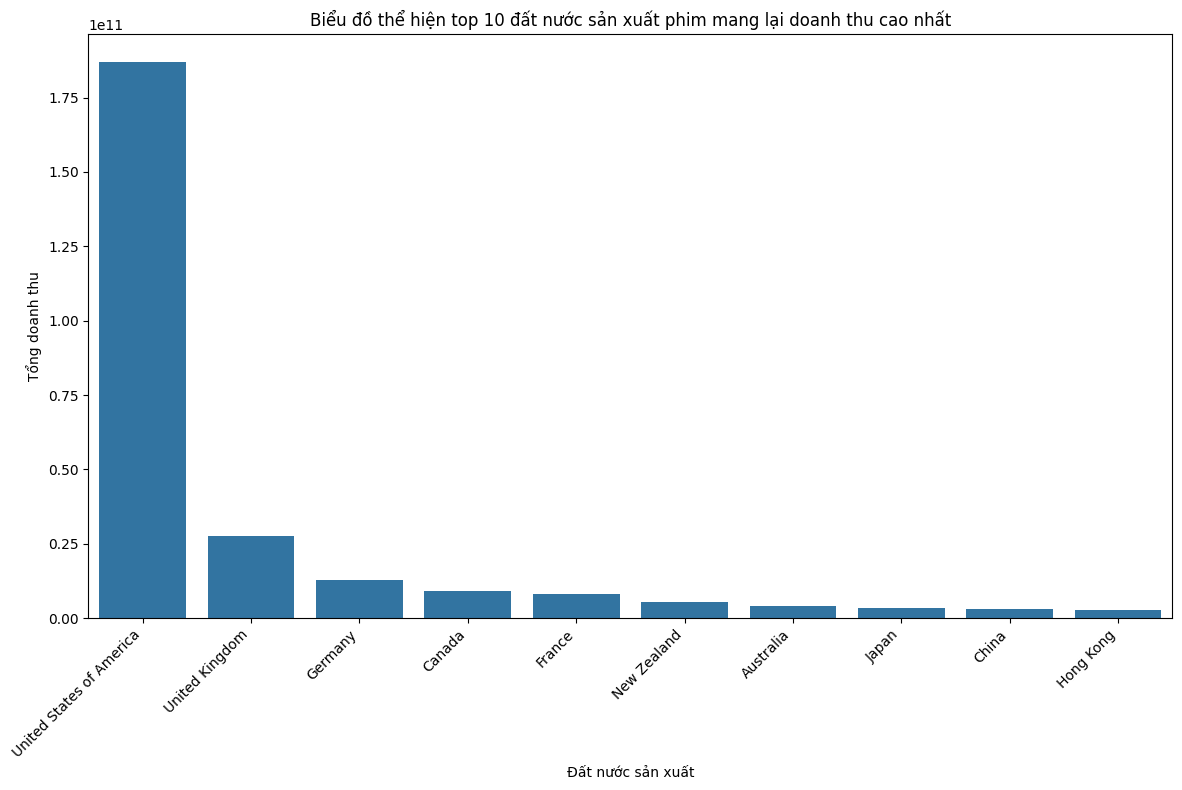

In [43]:
revenue_by_countries = pd.DataFrame({
    "countries": df["production_countries"].apply(lambda x: [names["name"] for names in x]),
    "revenue": df["revenue"]})

revenue_by_countries = revenue_by_countries.explode("countries").groupby("countries")["revenue"].sum().reset_index()
revenue_by_countries = revenue_by_countries.sort_values(by="revenue", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=revenue_by_countries[:10], x="countries", y="revenue", estimator=sum)
plt.title("Biểu đồ thể hiện top 10 đất nước sản xuất phim mang lại doanh thu cao nhất")
plt.xlabel("Đất nước sản xuất")
plt.ylabel("Tổng doanh thu")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Doanh thu phim do Mỹ sản xuất chiếm áp đảo so với các nước theo sau.

#### Biểu đồ thể hiện top 10 công ty sản xuất phim mang lại doanh thu cao nhất

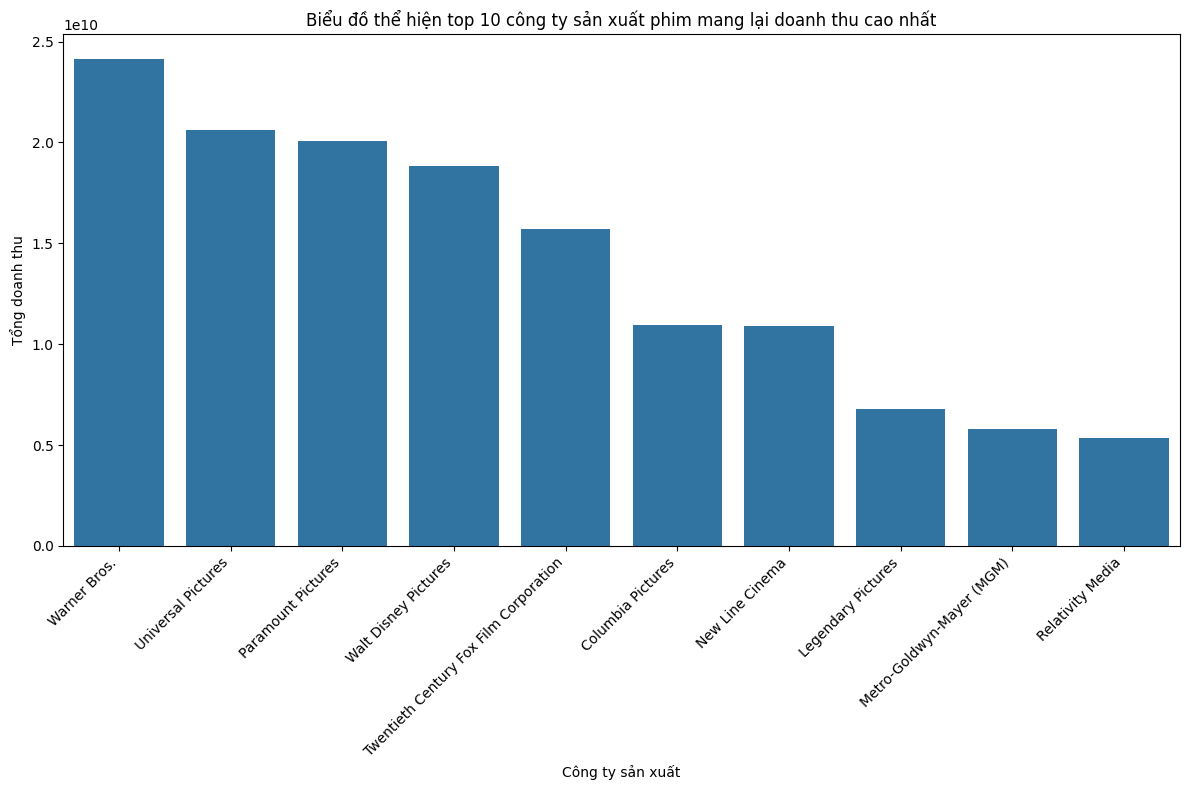

In [44]:
revenue_by_companies = pd.DataFrame({
    "companies": df["production_companies"].apply(lambda x: [names["name"] for names in x]),
    "revenue": df["revenue"]})

revenue_by_companies = revenue_by_companies.explode("companies").groupby("companies")["revenue"].sum().reset_index()
revenue_by_companies = revenue_by_companies.sort_values(by="revenue", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=revenue_by_companies[:10], x="companies", y="revenue", estimator=sum)
plt.title("Biểu đồ thể hiện top 10 công ty sản xuất phim mang lại doanh thu cao nhất")
plt.xlabel("Công ty sản xuất")
plt.ylabel("Tổng doanh thu")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- `Warner Bros.` là công ty sản xuất phim mang lại doanh thu cao nhất.

#### Biểu đồ thể hiện thể loại phim mang lại doanh thu cao nhất

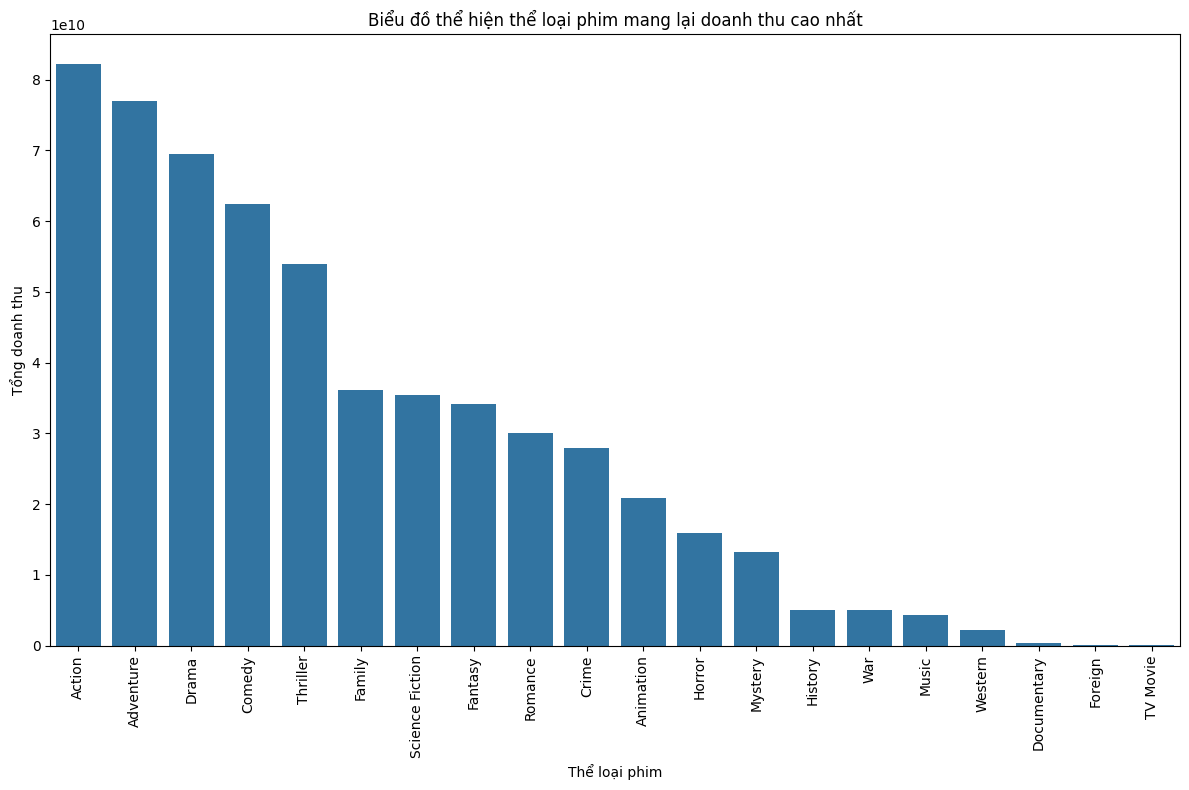

In [45]:
revenue_by_genres = pd.DataFrame({
    "genres": df["genres"].apply(lambda x: [names["name"] for names in x]),
    "revenue": df["revenue"]})

revenue_by_genres = revenue_by_genres.explode("genres").groupby("genres")["revenue"].sum().reset_index()
revenue_by_genres = revenue_by_genres.sort_values(by="revenue", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=revenue_by_genres, x="genres", y="revenue", estimator=sum)
plt.title("Biểu đồ thể hiện thể loại phim mang lại doanh thu cao nhất")
plt.xlabel("Thể loại phim")
plt.ylabel("Tổng doanh thu")
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

Nhận xét:
- Thể loại phim hành động mang về doanh thu cao nhất.

#### Biểu đồ thể hiện top 20 từ khóa trong phim mang lại doanh thu cao nhất

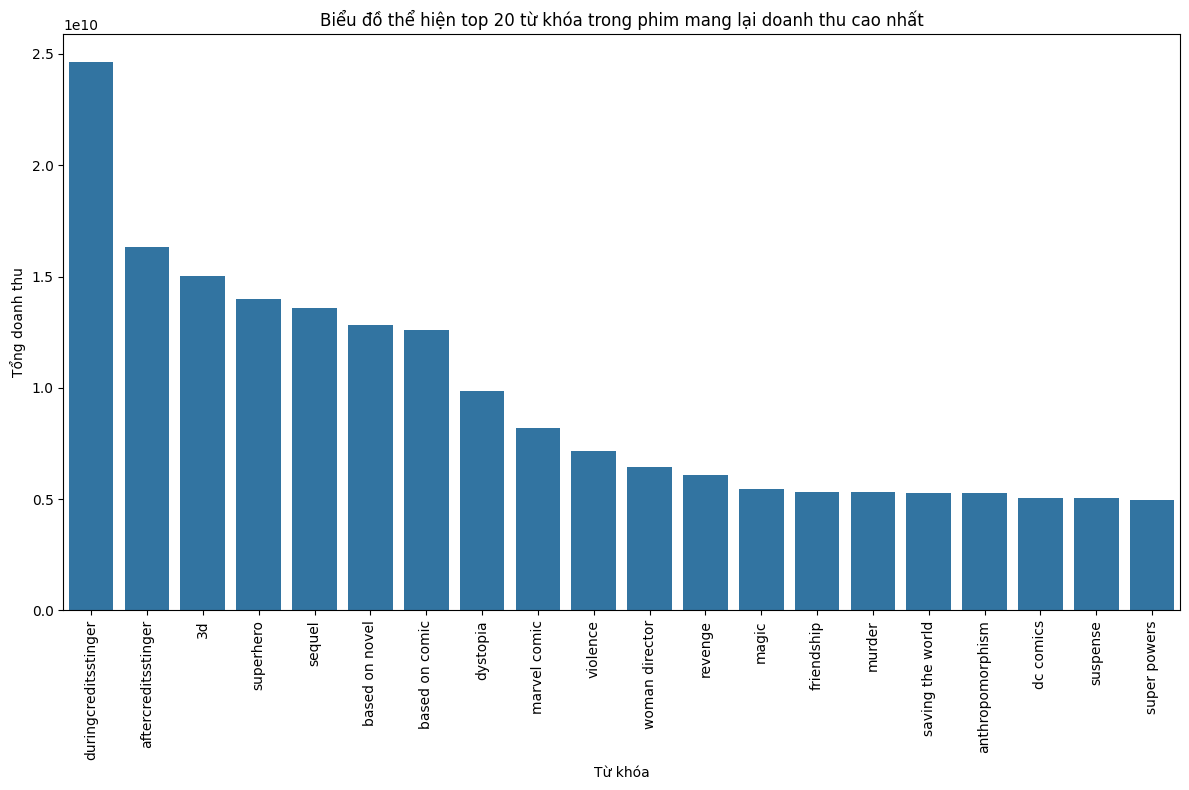

In [46]:
revenue_by_Keywords = pd.DataFrame({
    "Keywords": df["Keywords"].apply(lambda x: [names["name"] for names in x]),
    "revenue": df["revenue"]})

revenue_by_Keywords = revenue_by_Keywords.explode("Keywords").groupby("Keywords")["revenue"].sum().reset_index()
revenue_by_Keywords = revenue_by_Keywords.sort_values(by="revenue", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=revenue_by_Keywords[:20], x="Keywords", y="revenue", estimator=sum)
plt.title("Biểu đồ thể hiện top 20 từ khóa trong phim mang lại doanh thu cao nhất")
plt.xlabel("Từ khóa")
plt.ylabel("Tổng doanh thu")
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig("fig.png", bbox_inches="tight")
plt.show()

### **2.4.3.3. Phân tích đa biến**

#### Biểu đồ thể hiện các mối quan hệ theo cặp của các thuộc tính **`budget`**, **`runtime`**, **`popularity`**, **`revenue`**

<Figure size 2500x2000 with 0 Axes>

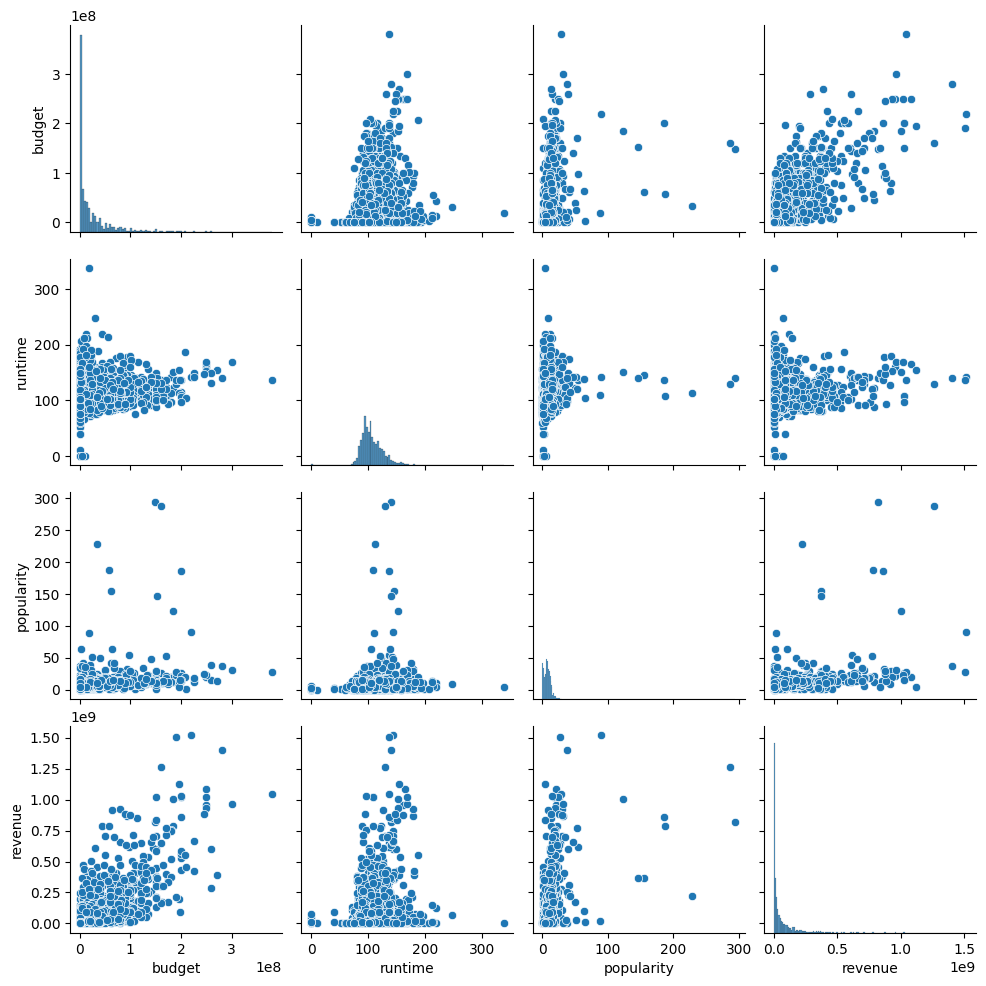

In [47]:
columns = ["budget", "runtime", "popularity", "revenue"]
plt.figure(figsize=(25, 20))
sns.pairplot(data= df[columns])
plt.savefig("fig.png", bbox_inches="tight")
plt.show()

- Nhận xét:
  + Khi thể hiện mối tương quan của biến **`popularity`** với biến **`revenue`**: Khi biến **`popularity`** tăng (với tốc độ chậm) trong khoảng 0 - 100 thì **`revenue`** cũng tăng theo, ngoài khoảng 0 - 100 thì sẽ bắt đầu có dấu hiệu giảm.
  + Khi thể hiện mối tương quan của biến **`runtime`** với biến **`revenue`**: Khi biến **`runtime`** tăng (với tốc độ chậm) trong khoảng 75 - 180 thì **`revenue`** cũng tăng theo, ngoài khoảng 75 - 180 thì sẽ bắt đầu có dấu hiệu giảm.
  + Khi thể hiện mối tương quan của biến **`budget`** với biến **`revenue`**: Khi biến **`budget`** tăng thì **`revenue`** cũng tăng theo.
  + Khi thể hiện mối tương quan của biến **`popularity`** với biến **`budget`**: Khi biến **`popularity`** tăng (với tốc độ chậm) trong khoảng 0 - 100 thì **`budget`** cũng tăng theo, ngoài khoảng 0 - 100 thì sẽ bắt đầu có dấu hiệu giảm.
  + Khi thể hiện mối tương quan của biến **`runtime`** với biến **`budget`**: Khi biến **`runtime`** tăng (với tốc độ chậm) trong khoảng 75 - 180 thì **`budget`** cũng tăng theo, ngoài khoảng 75 - 180 thì sẽ bắt đầu có dấu hiệu giảm.
  + Khi thể hiện mối tương quan của biến **`popularity`** với biến **`runtime`**: Khi biến **`popularity`** tăng (với tốc độ chậm) trong khoảng 0 - 100 thì **`runtime`** popularity tăng theo (với tốc độ chậm) trong khoảng 75 - 180.

#### Biểu đồ thể hiện mối tương quan giữa các thuộc tính có dữ liệu dạng số

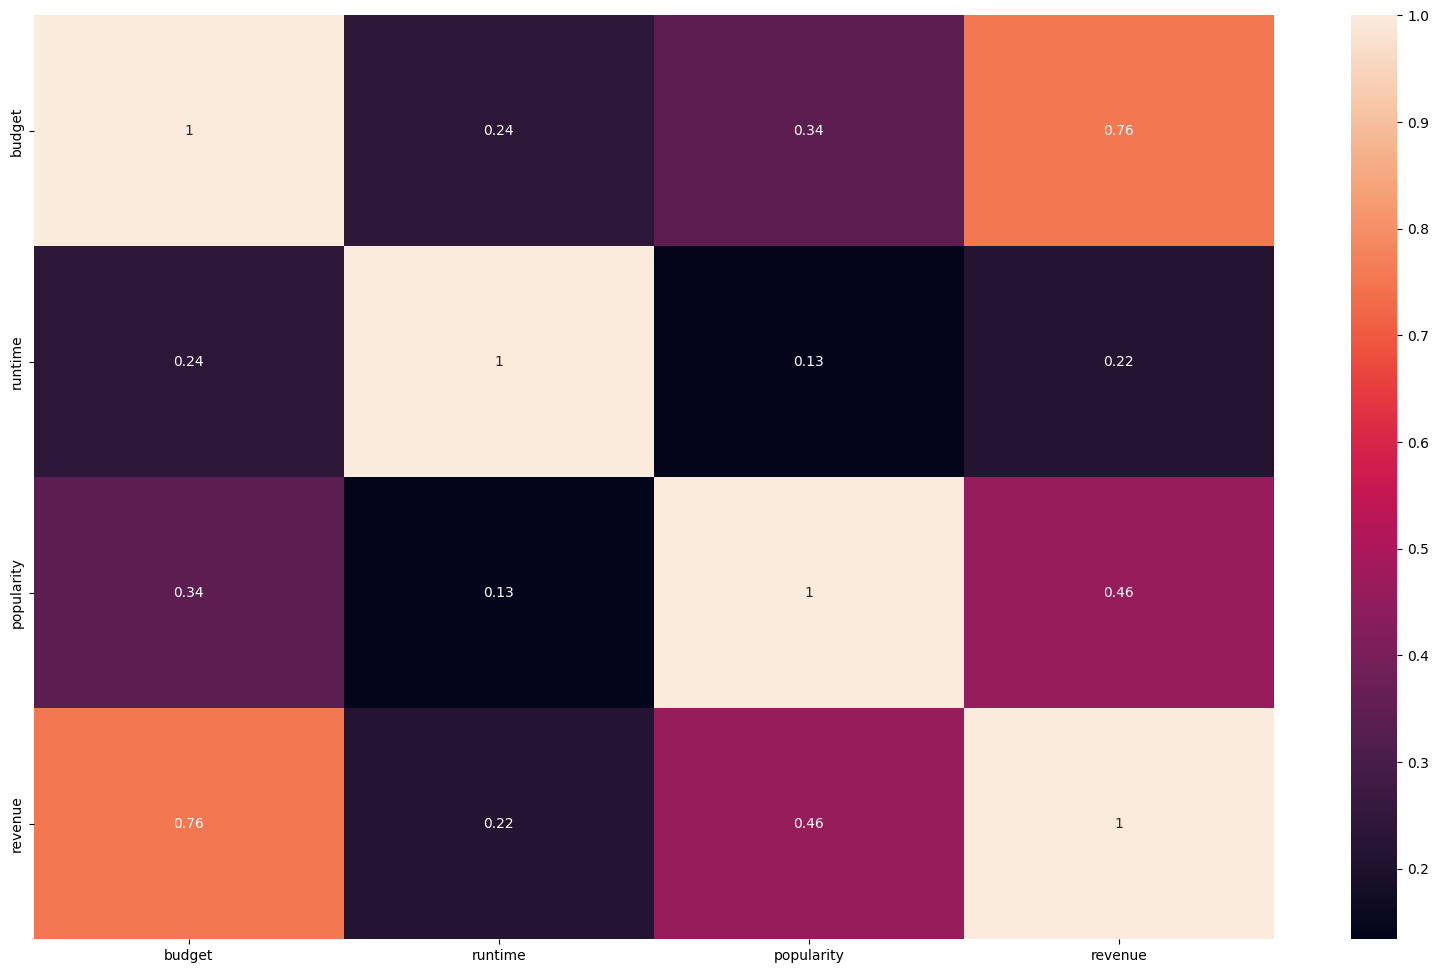

In [48]:
columns = ["budget", "runtime", "popularity", "revenue"]
plt.figure(figsize=(20,12))
corr_matrix = df[columns].corr()
sns.heatmap(corr_matrix, annot=True)
plt.savefig("fig.png", bbox_inches="tight")
plt.show()

- Nhận xét:
  - Thuộc tính **`revenue`** có mối tương quan mạnh với thuộc tính **`budget`**, tương quan vừa với thuộc tính **`popularity`** và tương quan yếu với thuộc tính **`runtime`**.

#### Trong thế kỉ 21, thể loại phim được đánh giá có độ nổi tiếng trung bình cao nhất qua mỗi năm là thể loại nào?

In [49]:
popularity_by_year_genres = pd.DataFrame({
    "release_year": release_date.dt.year,
    "genres": df["genres"].apply(lambda x: [names["name"] for names in x]),
    "popularity": df["popularity"],
})

popularity_by_year_genres = popularity_by_year_genres.explode("genres")\
                              .groupby(["release_year", "genres"])["popularity"].mean()\
                              .reset_index()

popularity_since_2001 = popularity_by_year_genres[popularity_by_year_genres["release_year"] > 2000]

max_popularity_idx = popularity_since_2001.groupby("release_year")["popularity"].idxmax()
max_popularity_genres = popularity_since_2001.loc[max_popularity_idx].reset_index(drop=True)
max_popularity_genres

,release_year,genres,popularity
0,2001,Adventure,11.585557
1,2002,Fantasy,16.672874
2,2003,Fantasy,21.434406
3,2004,Action,11.943041
4,2005,Animation,12.184262
5,2006,Animation,11.167312
6,2007,Mystery,11.359941
7,2008,Crime,19.005939
8,2009,Fantasy,11.394798
9,2010,Adventure,11.819404


Nhận xét:
- Thể loại phim nổi tiếng nhất qua các năm chủ yếu là `Adventure`, `Fantasy`, `Animation`.

#### Trong thế kỉ 21, thể loại phim được đánh giá có doanh thu trung bình cao nhất qua mỗi năm là thể loại nào?

In [50]:
revenue_by_year_genres = pd.DataFrame({
    "release_year": release_date.dt.year,
    "genres": df["genres"].apply(lambda x: [names["name"] for names in x]),
    "revenue": df["revenue"],
})

revenue_by_year_genres = revenue_by_year_genres.explode("genres")\
                              .groupby(["release_year", "genres"])["revenue"].mean()\
                              .reset_index()

revenue_since_2001 = revenue_by_year_genres[revenue_by_year_genres["release_year"] > 2000]

max_revenue_idx = revenue_since_2001.groupby("release_year")["revenue"].idxmax()
max_revenue_genres = revenue_since_2001.loc[max_revenue_idx].reset_index(drop=True)
max_revenue_genres

,release_year,genres,revenue
0,2001,Adventure,2.084082e+08
1,2002,Fantasy,4.194660e+08
2,2003,Science Fiction,3.061423e+08
3,2004,Adventure,2.052152e+08
4,2005,Science Fiction,2.894819e+08
5,2006,Animation,1.791940e+08
6,2007,Fantasy,2.553253e+08
7,2008,Animation,2.765252e+08
8,2009,Family,2.801000e+08
9,2010,Adventure,2.518890e+08


Nhận xét:
- Thể loại phim mang  lại doanh thu trung bình cao nhất qua các năm chủ yếu là `Adventure`, `Fantasy`, `Science Fiction`, `Animation`.
- Khi so sánh 2 bảng ta thấy, có những năm thể loại phim nổi tiếng nhất lại không mang về doanh thu cao nhất.